<a href="https://colab.research.google.com/github/ayushabhinav/SentimentalAnalysis/blob/main/Sentimental_Analysis_CMU_MOSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import libraries
import os
import requests
import warnings
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.0
    Uninstalling typeguard-4.4.0:
      Successfully uninstalled typeguard-4.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [4]:
!pip install tensorflow==2.15.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 108.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installatio

In [1]:
import numpy as np
import pandas as pd

from sklearn import metrics

import tensorflow_addons as tfa

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Input, LSTM, Dense, Masking
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [3]:
warnings.filterwarnings('ignore')
tf.random.set_seed(24)

In [9]:
!gdown --fuzzy "https://drive.google.com/file/d/1_XdzdW8UNG1TTS6QcX10uhoS6N11OBit/view?usp=share_link"

Downloading...
From (original): https://drive.google.com/uc?id=1_XdzdW8UNG1TTS6QcX10uhoS6N11OBit
From (redirected): https://drive.google.com/uc?id=1_XdzdW8UNG1TTS6QcX10uhoS6N11OBit&confirm=t&uuid=b645252b-4dd6-44eb-812e-84a18538ca3e
To: /content/mosi_data.pkl
100% 154M/154M [00:02<00:00, 72.0MB/s]


In [10]:
import pickle as pkl

# Load the CMU_MOSI Data file
data_file = '/content/mosi_data.pkl'

# Load data from the local pickle file
data = None
with open(data_file, 'rb') as infile:
    data = pkl.load(infile)


In [11]:
# Download CMU_MOSI Data file
# data_file = 'mosi_data_50.pkl'

# if not os.path.exists(data_file):
#   res = requests.get('http://immortal.multicomp.cs.cmu.edu/raw_datasets/processed_data/cmu-mosi/seq_length_50/mosi_data.pkl')
#   with open(data_file , 'wb') as outfile:
#     outfile.write(res.content)

# # !wget http://immortal.multicomp.cs.cmu.edu/raw_datasets/processed_data/cmu-mosi/seq_length_50/mosi_data.pkl

In [5]:
!mv mosi_data.pkl mosi_data_50.pkl
!ls -lrt

total 8
drwxr-xr-x 1 root root 4096 Nov  7 20:56 sample_data
-rw-r--r-- 1 root root  356 Nov 10 15:53 mosi_data_50.pkl


In [12]:
with open(data_file, 'r') as infile:
    print(infile.read(100))  # Print the first 100 characters for inspection

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

In [13]:
# Load data from pickled file
data = None
with open(data_file, 'rb') as infile:
  data = pkl.load(infile)

In [14]:
data.keys()

dict_keys(['valid', 'test', 'train'])

In [15]:
# Seperate data in train, test and validation sets
data_train = data['train']
data_test = data['test']
data_valid = data['valid']

In [16]:
data_test_label_actual = np.squeeze(data_test['labels'] > 0.5)

In [17]:
data_train.keys()

dict_keys(['vision', 'labels', 'text', 'audio', 'id'])

In [18]:
# labels are here for the regesssion purpose
data_train['labels']

array([[[-0.5]],

       [[-1.2]],

       [[ 1.8]],

       ...,

       [[ 0.6]],

       [[-0.4]],

       [[ 2. ]]])

In [19]:
# pd.DataFrame({'id':data_valid['id']})
valid_data_df = pd.DataFrame({
                    'f_name': data_valid['id'][:,0],
                    's_time': data_valid['id'][:,1],
                    'e_time': data_valid['id'][:,2],
                    'true_labels' : np.squeeze(data_valid['labels'][:,0] >= 0)
                })
valid_data_df

,f_name,s_time,e_time,true_labels
0,b'WKA5OygbEKI_20',b'131.7929705',b'133.6886621',True
1,b'WKA5OygbEKI_21',b'133.6886621',b'138.976644',True
2,b'WKA5OygbEKI_22',b'170.544898',b'172.729932',True
3,b'WKA5OygbEKI_1',b'4.432426304',b'8.852380952',True
4,b'WKA5OygbEKI_3',b'45.95804989',b'49.69954649',True
...,...,...,...,...
224,b'c5xsKMxpXnc_4',b'133.2097506',b'135.8836735',True
225,b'c5xsKMxpXnc_7',b'149.3829932',b'152.4360544',False
226,b'c5xsKMxpXnc_6',b'146.7290249',b'149.3829932',False
227,b'c5xsKMxpXnc_9',b'156.6764172',b'159.0609977',False


### Analysis On the textual data as regression

In [20]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Input, LSTM, Dense, Masking
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [21]:
# function to build the model with different configuration
def get_model(n_unit=64, n_layer=1, mask_value=0.0, seq_len=50, latent_dim=300,
              model_name='model_name'):
  input_shape = (seq_len, latent_dim)
  mask_value = np.zeros(shape=(latent_dim,), dtype=np.float32)

  input = Input(shape=input_shape, name='input_layer')
  mask_lyr = Masking(mask_value=mask_value, name='masking_layer')

  layers = []
  for id in range(1, n_layer+1):
    if id != n_layer:
      layers.append(
          LSTM(n_unit, return_sequences=True, name=f'lstm_layer_{id}')
      )
    else:
      layers.append(
       LSTM(n_unit, return_sequences=False, name=f'lstm_layer_{id}')
      )
  layers.append(
      Dense(1, activation='relu', name='dense_layer')
  )

  x = mask_lyr(input)
  for layer in layers:
    x = layer(x)

  model = Model(inputs=input, outputs=x, name=model_name)
  return model


In [22]:
#preparing the data for training
AUTOTUNE = tf.data.experimental.AUTOTUNE
buffer_size = 64
batch_size = 64

train_ds = tf.data.Dataset.from_tensor_slices(
                (
                    data_train['text'],
                    data_train['labels']
                )
            ).map(lambda x,y: (x, y+3)) \
            .shuffle(buffer_size).batch(batch_size).prefetch(AUTOTUNE)

valid_ds = tf.data.Dataset.from_tensor_slices(
                (
                    data_valid['text'],
                    data_valid['labels']
                )
            ).map(lambda x,y: (x, y+3)) \
            .shuffle(buffer_size).batch(batch_size).prefetch(AUTOTUNE)

In [23]:
for data in train_ds.take(1):
  print(data)

(<tf.Tensor: shape=(64, 50, 300), dtype=float32, numpy=
array([[[ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        ...,
        [-0.21162  ,  0.50881  , -0.35808  , ..., -0.18072  ,
          0.28116  ,  0.16978  ],
        [-0.21162  ,  0.50881  , -0.35808  , ..., -0.18072  ,
          0.28116  ,  0.16978  ],
        [-0.34338  ,  0.1677   , -0.1448   , ...,  0.095014 ,
         -0.073342 ,  0.47798  ]],

       [[ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        ...,
        [ 0.18733  ,  0.40595  , -0.51174  , ...,  0

In [24]:
# compile the model
def compile_model(model):

  optimizer = tf.keras.optimizers.Adam()
  loss = tf.keras.losses.MeanSquaredError()
  metrics = tf.keras.metrics.RootMeanSquaredError()


  model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
  print(f'Model-{model.name} is compiled successfully')

In [25]:
# train and plot losses
def train_plot_result(model, train_ds=train_ds, val_ds=valid_ds, epochs=500, verbose=1, **kwargs):
    file_path = os.path.join(os.getcwd(), f'{model.name}_checkpoint')
    if not os.path.exists(file_path):
      os.makedirs(file_path)

    early_stopping   = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=file_path, save_best_only=True)
    callbacks = [early_stopping, model_checkpoint]

    history = model.fit(train_ds, epochs=epochs, validation_data=valid_ds, callbacks=callbacks,verbose=verbose, **kwargs)

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.plot(loss, label='train_loss')
    plt.plot(val_loss, label='val_loss')
    plt.legend()
    plt.title(f'{model.name} losses')
    plt.show()
    return history

In [26]:
# plot correctness of pred wrt actual value
def check_correctness(model, data_X, data_y):

  y_pred = np.squeeze(np.ceil(model(data_X)))
  y_true = np.squeeze( np.ceil(data_y) )

  true_match = sum(y_pred == y_true)
  print(f'Accuracy: {round(true_match * 100 /len(y_pred), 2)}%')

  plt.title('Pred Vs Actual Classes Matching')
  sns.countplot(y_pred == y_true )
  plt.show()

  plt.title('Pred Class Count')
  sns.countplot(y_pred)
  plt.show()

  plt.title('Actual Class Count ')
  sns.countplot(y_true)
  plt.show()

##### Model - 1LSTM64

In [27]:
model1 = get_model(model_name='Basic_Model-1LSTM64')
model1.summary()

Model: "Basic_Model-1LSTM64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 50, 300)]         0         
                                                                 
 masking_layer (Masking)     (None, 50, 300)           0         
                                                                 
 lstm_layer_1 (LSTM)         (None, 64)                93440     
                                                                 
 dense_layer (Dense)         (None, 1)                 65        
                                                                 
Total params: 93505 (365.25 KB)
Trainable params: 93505 (365.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model-Basic_Model-1LSTM64 is compiled successfully
Epoch 1/500
21/21 [==============================] - 14s 351ms/step - loss: 4.9265 - root_mean_squared_error: 2.2196 - val_loss: 2.7592 - val_root_mean_squared_error: 1.6611
Epoch 2/500
21/21 [==============================] - 7s 348ms/step - loss: 2.2243 - root_mean_squared_error: 1.4914 - val_loss: 2.6044 - val_root_mean_squared_error: 1.6138
Epoch 3/500
21/21 [==============================] - 6s 292ms/step - loss: 2.0216 - root_mean_squared_error: 1.4218 - val_loss: 2.3997 - val_root_mean_squared_error: 1.5491
Epoch 4/500
21/21 [==============================] - 5s 266ms/step - loss: 1.8800 - root_mean_squared_error: 1.3711 - val_loss: 2.2621 - val_root_mean_squared_error: 1.5040
Epoch 5/500
21/21 [==============================] - 7s 346ms/step - loss: 1.7121 - root_mean_squared_error: 1.3085 - val_loss: 2.2174 - val_root_mean_squared_error: 1.4891
Epoch 6/500
21/21 [==============================] - 3s 135ms/step - loss: 1.5783 -

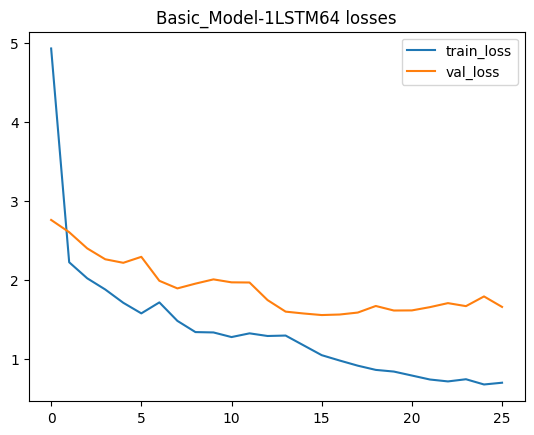

Epoch 1/50
21/21 [==============================] - 2s 104ms/step - loss: 0.9966 - root_mean_squared_error: 0.9983 - val_loss: 1.5909 - val_root_mean_squared_error: 1.2613
Epoch 2/50
21/21 [==============================] - 2s 98ms/step - loss: 0.9549 - root_mean_squared_error: 0.9772 - val_loss: 1.6246 - val_root_mean_squared_error: 1.2746
Epoch 3/50
21/21 [==============================] - 2s 104ms/step - loss: 0.9104 - root_mean_squared_error: 0.9541 - val_loss: 1.6440 - val_root_mean_squared_error: 1.2822
Epoch 4/50
21/21 [==============================] - 4s 178ms/step - loss: 0.8704 - root_mean_squared_error: 0.9329 - val_loss: 1.6836 - val_root_mean_squared_error: 1.2975
Epoch 5/50
21/21 [==============================] - 2s 105ms/step - loss: 0.8383 - root_mean_squared_error: 0.9156 - val_loss: 1.6632 - val_root_mean_squared_error: 1.2896
Epoch 6/50
21/21 [==============================] - 2s 100ms/step - loss: 0.7982 - root_mean_squared_error: 0.8934 - val_loss: 1.6035 - val_r

In [28]:
compile_model(model1)
train_plot_result(model1)
model1.fit(train_ds, validation_data=valid_ds, epochs=50)

Accuracy: 0.0%


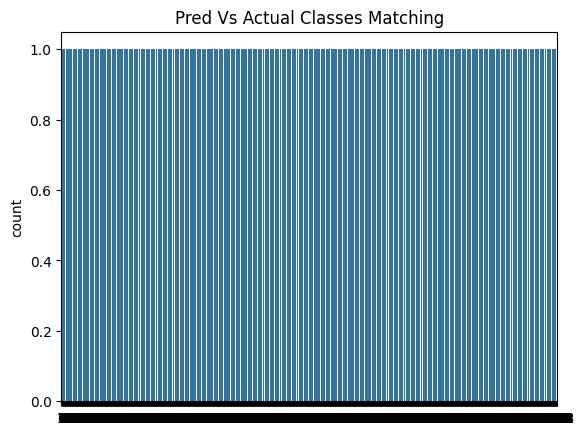

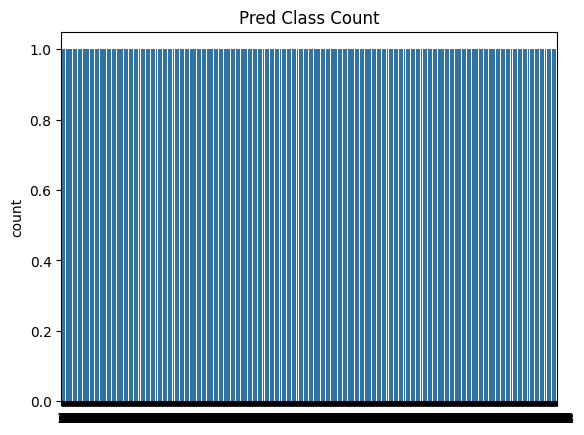

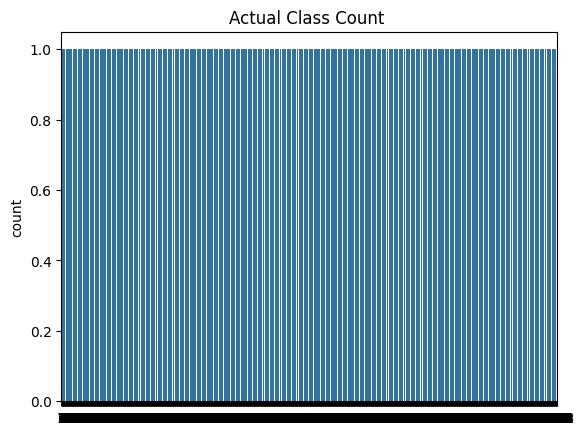

In [29]:
check_correctness(model1, data_train['text'], data_train['labels'])

##### Model 2LSTM64

In [30]:
model2 = get_model(model_name='Basic_Model_2LSTM64', n_unit=64, n_layer=2)
compile_model(model2)

Model-Basic_Model_2LSTM64 is compiled successfully


In [31]:
model2.summary()

Model: "Basic_Model_2LSTM64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 50, 300)]         0         
                                                                 
 masking_layer (Masking)     (None, 50, 300)           0         
                                                                 
 lstm_layer_1 (LSTM)         (None, 50, 64)            93440     
                                                                 
 lstm_layer_2 (LSTM)         (None, 64)                33024     
                                                                 
 dense_layer (Dense)         (None, 1)                 65        
                                                                 
Total params: 126529 (494.25 KB)
Trainable params: 126529 (494.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/500
21/21 [==============================] - 23s 687ms/step - loss: 6.3691 - root_mean_squared_error: 2.5237 - val_loss: 3.0065 - val_root_mean_squared_error: 1.7339
Epoch 2/500
21/21 [==============================] - 13s 631ms/step - loss: 2.4553 - root_mean_squared_error: 1.5669 - val_loss: 2.8640 - val_root_mean_squared_error: 1.6923
Epoch 3/500
21/21 [==============================] - 11s 561ms/step - loss: 2.3516 - root_mean_squared_error: 1.5335 - val_loss: 2.7493 - val_root_mean_squared_error: 1.6581
Epoch 4/500
21/21 [==============================] - 13s 639ms/step - loss: 2.2651 - root_mean_squared_error: 1.5050 - val_loss: 2.6129 - val_root_mean_squared_error: 1.6165
Epoch 5/500
21/21 [==============================] - 5s 252ms/step - loss: 2.0002 - root_mean_squared_error: 1.4143 - val_loss: 2.7789 - val_root_mean_squared_error: 1.6670
Epoch 6/500
21/21 [==============================] - 4s 200ms/step - loss: 2.0112 - root_mean_squared_error: 1.4182 - val_loss: 2.7

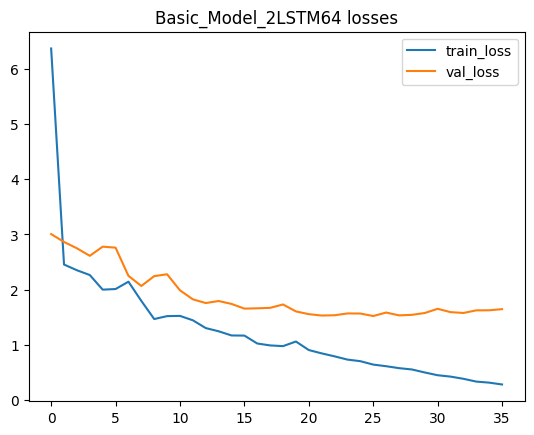

In [32]:
train_plot_result(model2)

Accuracy: 0.55%


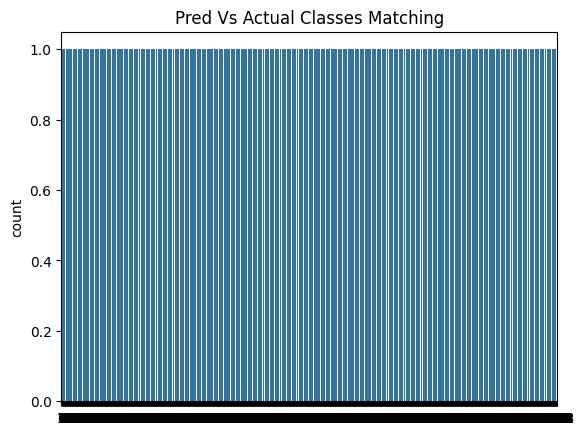

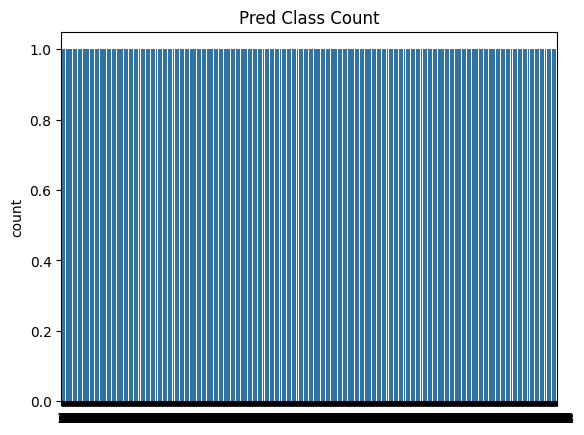

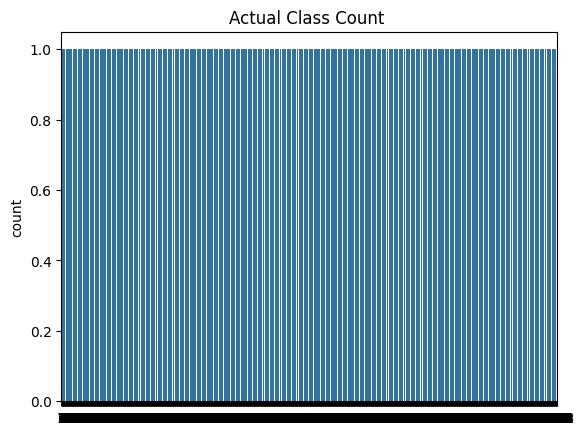

In [33]:
check_correctness(model2, data_train['text'], data_train['labels'])

##### model 1lSTM128

In [34]:
model3 = get_model(model_name='Basic_Model_1LSTM128', n_unit=128)
compile_model(model3)

Model-Basic_Model_1LSTM128 is compiled successfully


Epoch 1/500
21/21 [==============================] - 13s 368ms/step - loss: 3.9367 - root_mean_squared_error: 1.9841 - val_loss: 3.1110 - val_root_mean_squared_error: 1.7638
Epoch 2/500
21/21 [==============================] - 7s 325ms/step - loss: 2.3649 - root_mean_squared_error: 1.5378 - val_loss: 2.4165 - val_root_mean_squared_error: 1.5545
Epoch 3/500
21/21 [==============================] - 6s 273ms/step - loss: 1.9683 - root_mean_squared_error: 1.4029 - val_loss: 2.3421 - val_root_mean_squared_error: 1.5304
Epoch 4/500
21/21 [==============================] - 7s 322ms/step - loss: 1.8747 - root_mean_squared_error: 1.3692 - val_loss: 2.1662 - val_root_mean_squared_error: 1.4718
Epoch 5/500
21/21 [==============================] - 2s 102ms/step - loss: 1.6326 - root_mean_squared_error: 1.2777 - val_loss: 2.1962 - val_root_mean_squared_error: 1.4820
Epoch 6/500
21/21 [==============================] - 2s 102ms/step - loss: 1.5137 - root_mean_squared_error: 1.2303 - val_loss: 2.4043

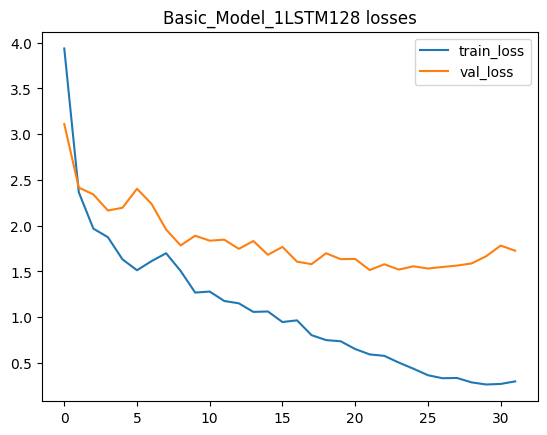

In [35]:
train_plot_result(model3)

Accuracy: 0.23%


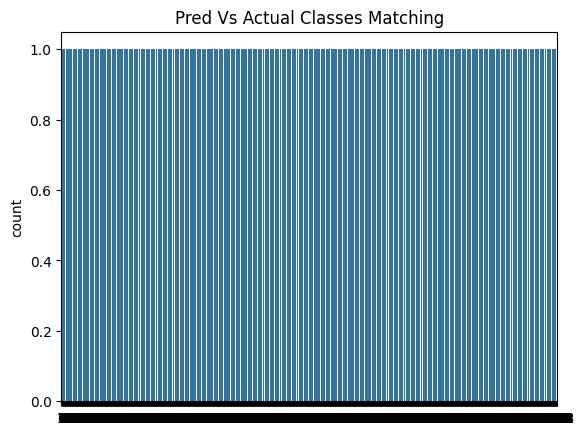

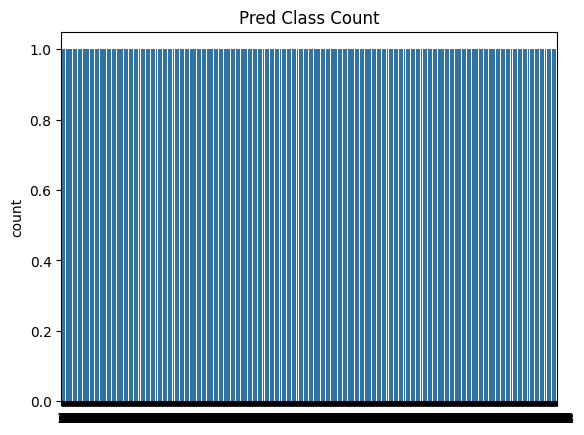

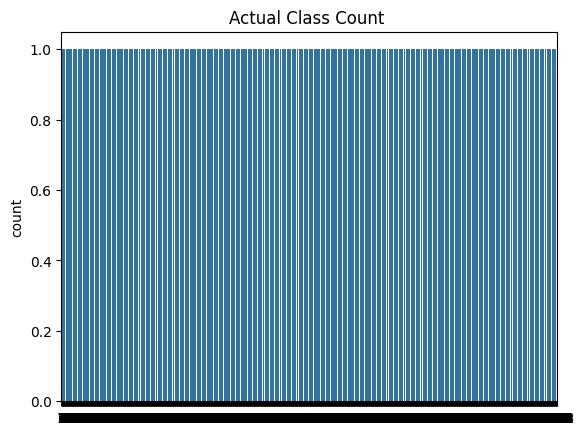

In [36]:
check_correctness(model3, data_train['text'], data_train['labels'])

###### Model 2LSTM128

In [37]:
model4 = get_model(model_name='Basic_Model_2LSTM128', n_unit=128, n_layer=2)
compile_model(model4)

Model-Basic_Model_2LSTM128 is compiled successfully


Epoch 1/500
21/21 [==============================] - 29s 771ms/step - loss: 4.0796 - root_mean_squared_error: 2.0198 - val_loss: 3.1005 - val_root_mean_squared_error: 1.7608
Epoch 2/500
21/21 [==============================] - 5s 228ms/step - loss: 2.2586 - root_mean_squared_error: 1.5029 - val_loss: 3.1067 - val_root_mean_squared_error: 1.7626
Epoch 3/500
21/21 [==============================] - 4s 199ms/step - loss: 2.1411 - root_mean_squared_error: 1.4632 - val_loss: 3.1831 - val_root_mean_squared_error: 1.7841
Epoch 4/500
21/21 [==============================] - 12s 606ms/step - loss: 2.2038 - root_mean_squared_error: 1.4845 - val_loss: 2.7874 - val_root_mean_squared_error: 1.6696
Epoch 5/500
21/21 [==============================] - 13s 656ms/step - loss: 2.2069 - root_mean_squared_error: 1.4856 - val_loss: 2.2122 - val_root_mean_squared_error: 1.4873
Epoch 6/500
21/21 [==============================] - 4s 202ms/step - loss: 1.7786 - root_mean_squared_error: 1.3336 - val_loss: 2.27

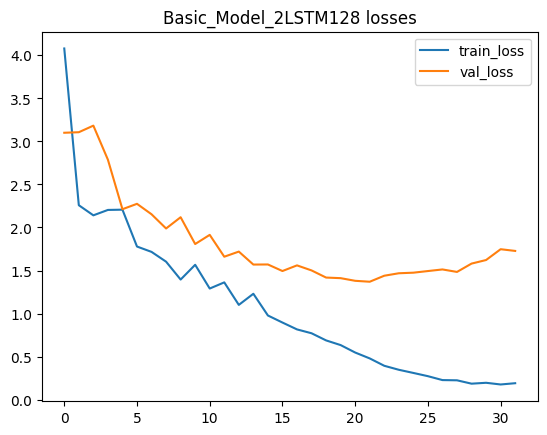

In [38]:
train_plot_result(model4)

Accuracy: 0.23%


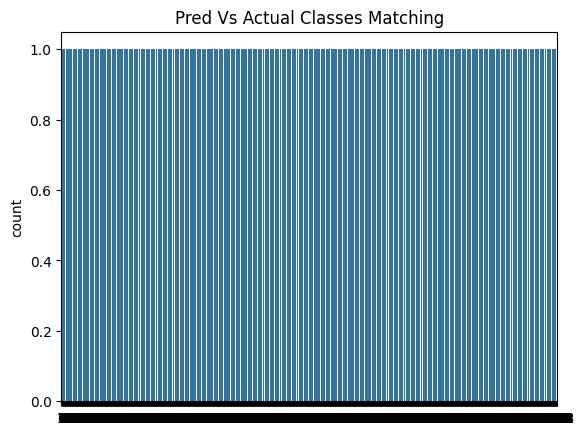

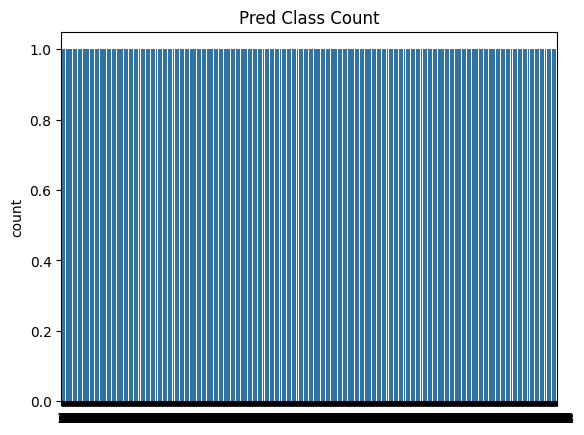

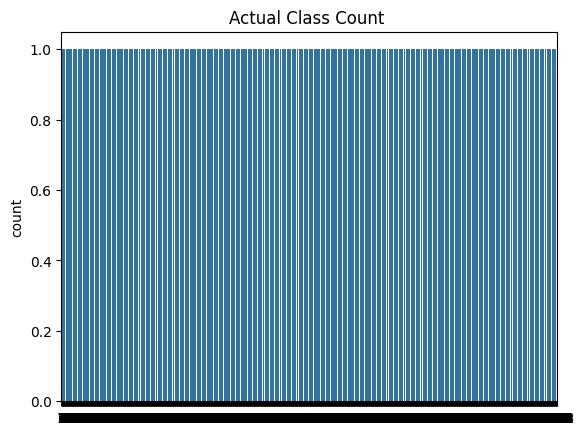

In [39]:
check_correctness(model4, data_train['text'], data_train['labels'])

##### model 1LSTM256

In [40]:
model5 = get_model(model_name='Basic_Model_1LSTM256', n_unit=256)
compile_model(model5)

Model-Basic_Model_1LSTM256 is compiled successfully


Epoch 1/500
21/21 [==============================] - 14s 409ms/step - loss: 3.7419 - root_mean_squared_error: 1.9344 - val_loss: 2.7740 - val_root_mean_squared_error: 1.6655
Epoch 2/500
21/21 [==============================] - 8s 419ms/step - loss: 2.1551 - root_mean_squared_error: 1.4680 - val_loss: 2.5465 - val_root_mean_squared_error: 1.5958
Epoch 3/500
21/21 [==============================] - 6s 298ms/step - loss: 1.9792 - root_mean_squared_error: 1.4069 - val_loss: 2.2438 - val_root_mean_squared_error: 1.4979
Epoch 4/500
21/21 [==============================] - 3s 166ms/step - loss: 1.7342 - root_mean_squared_error: 1.3169 - val_loss: 2.2695 - val_root_mean_squared_error: 1.5065
Epoch 5/500
21/21 [==============================] - 6s 274ms/step - loss: 1.7543 - root_mean_squared_error: 1.3245 - val_loss: 2.1171 - val_root_mean_squared_error: 1.4550
Epoch 6/500
21/21 [==============================] - 2s 103ms/step - loss: 1.6317 - root_mean_squared_error: 1.2774 - val_loss: 2.1842

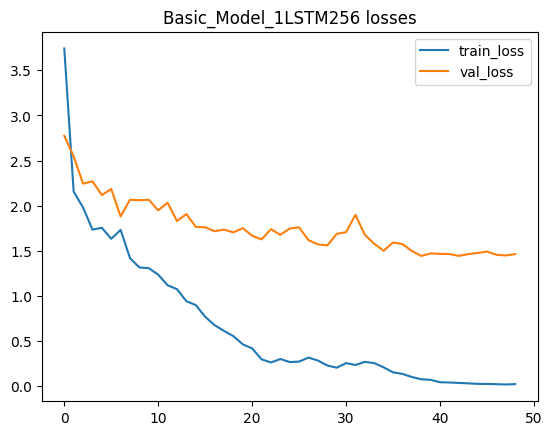

In [41]:
train_plot_result(model5)

Accuracy: 0.0%


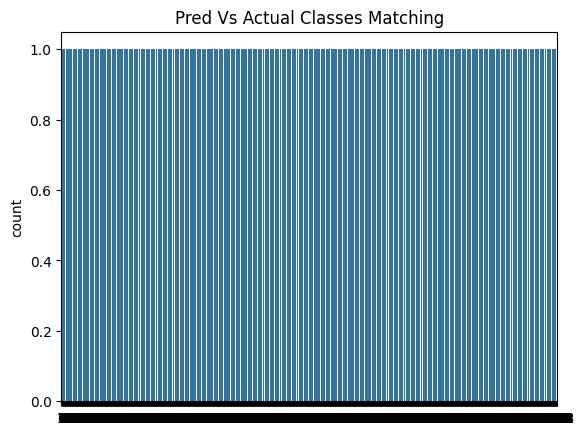

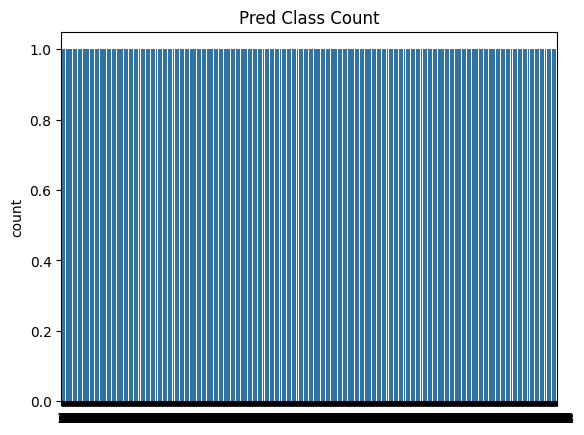

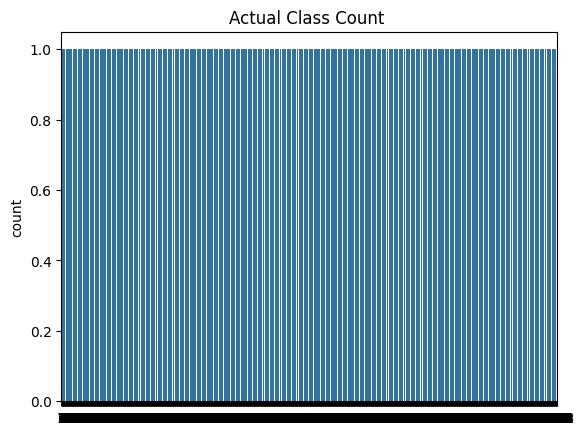

In [42]:
check_correctness(model5, data_train['text'], data_train['labels'])

##### model 2LSTM256

In [43]:
model6 = get_model(model_name='Basic_Model_2LSTM256', n_unit=256, n_layer=2)
compile_model(model6)

Model-Basic_Model_2LSTM256 is compiled successfully


Epoch 1/500
21/21 [==============================] - 22s 706ms/step - loss: 4.3795 - root_mean_squared_error: 2.0927 - val_loss: 3.5264 - val_root_mean_squared_error: 1.8779
Epoch 2/500
21/21 [==============================] - 13s 632ms/step - loss: 2.9197 - root_mean_squared_error: 1.7087 - val_loss: 2.6378 - val_root_mean_squared_error: 1.6241
Epoch 3/500
21/21 [==============================] - 12s 592ms/step - loss: 2.2120 - root_mean_squared_error: 1.4873 - val_loss: 2.4793 - val_root_mean_squared_error: 1.5746
Epoch 4/500
21/21 [==============================] - 8s 362ms/step - loss: 1.9817 - root_mean_squared_error: 1.4077 - val_loss: 2.9294 - val_root_mean_squared_error: 1.7115
Epoch 5/500
21/21 [==============================] - 13s 645ms/step - loss: 2.1326 - root_mean_squared_error: 1.4604 - val_loss: 2.3992 - val_root_mean_squared_error: 1.5489
Epoch 6/500
21/21 [==============================] - 4s 202ms/step - loss: 1.7548 - root_mean_squared_error: 1.3247 - val_loss: 2.4

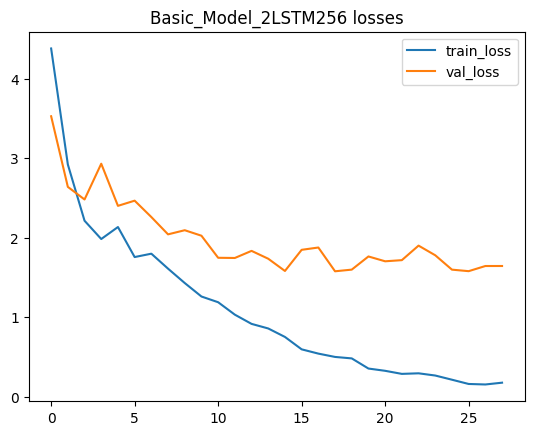

In [44]:
train_plot_result(model6)

Accuracy: 0.23%


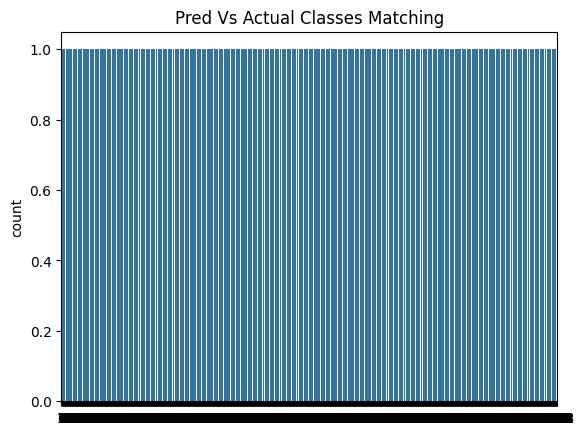

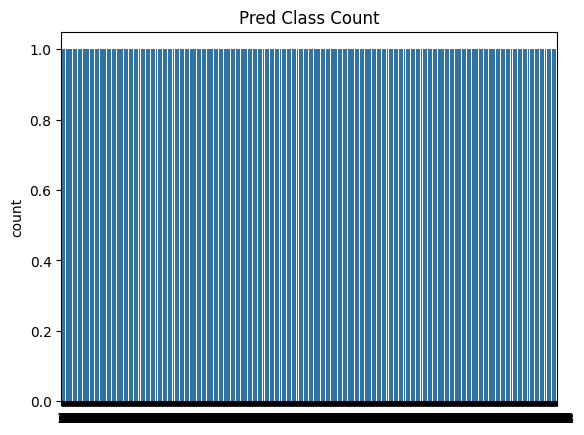

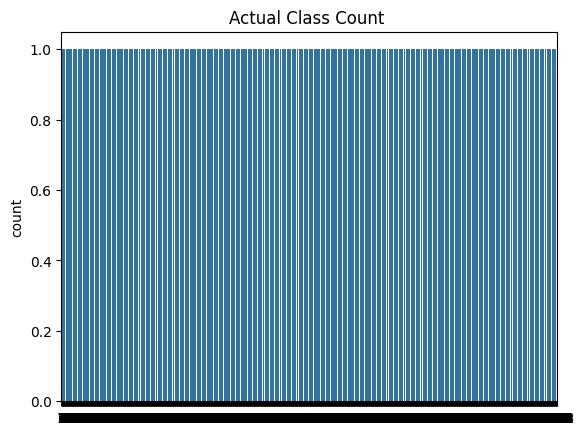

In [45]:
check_correctness(model6, data_train['text'], data_train['labels'])

### Adding Attention Layer

#### Method 1

In [46]:

from tensorflow.keras import initializers, regularizers, constraints

def dot_product(x, kernel):
    """
    Wrapper for dot product operation, in order to be compatible with both
    Theano and Tensorflow
    Args:
        x (): input
        kernel (): weights
    Returns:
    """
    if K.backend() == 'tensorflow':
        return K.squeeze(K.dot(x, K.expand_dims(kernel)), axis=-1)
    else:
        return K.dot(x, kernel)

class AttentionLayer(tf.keras.layers.Layer):
    """
    Attention operation, with a context/query vector, for temporal data.
    Supports Masking.
    Follows the work of Yang et al. [https://www.cs.cmu.edu/~diyiy/docs/naacl16.pdf]
    "Hierarchical Attention Networks for Document Classification"
    by using a context vector to assist the attention
    # Input shape
        3D tensor with shape: `(samples, steps, features)`.
    # Output shape
        2D tensor with shape: `(samples, features)`.
    How to use:
    Just put it on top of an RNN Layer (GRU/LSTM/SimpleRNN) with return_sequences=True.
    The dimensions are inferred based on the output shape of the RNN.
    Note: The layer has been tested with Keras 2.0.6
    Example:
        model.add(LSTM(64, return_sequences=True))
        model.add(AttentionWithContext())
        # next add a Dense layer (for classification/regression) or whatever...
    """

    def __init__(self,
                 W_regularizer=None, u_regularizer=None, b_regularizer=None,
                 W_constraint=None, u_constraint=None, b_constraint=None,
                 bias=True, **kwargs):

        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.u_regularizer = regularizers.get(u_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.u_constraint = constraints.get(u_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight(name='w', shape=(input_shape[-1], input_shape[-1],),
                                 initializer='normal' )
                                #  initializer=self.init,
                                #  name='{}_W'.format('w'), #self.name),
                                #  regularizer=self.W_regularizer,
                                #  constraint=self.W_constraint)
        if self.bias:
            self.b = self.add_weight(name='b', shape=(input_shape[-1],),
                                     initializer='zero')
                                    #  name='{}_b'.format('b'), #self.name),
                                    #  regularizer=self.b_regularizer,
                                    #  constraint=self.b_constraint)

        self.u = self.add_weight(name='u', shape=(input_shape[-1],),
                                 initializer=self.init,
                                #  name='{}_u'.format('u'), #self.name),
                                 regularizer=self.u_regularizer,
                                 constraint=self.u_constraint)

        super(AttentionLayer, self).build(input_shape)

    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None

    def call(self, x, mask=None):
        uit = dot_product(x, self.W)

        if self.bias:
            uit += self.b

        uit = K.tanh(uit)
        ait = dot_product(uit, self.u)

        a = K.exp(ait)

        # apply mask after the exp. will be re-normalized next
        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            a *= K.cast(mask, K.floatx())

        # in some cases especially in the early stages of training the sum may be almost zero
        # and this results in NaN's. A workaround is to add a very small positive number ε to the sum.
        # a /= K.cast(K.sum(a, axis=1, keepdims=True), K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0], input_shape[-1]

#### Method 2

In [47]:
import tensorflow.keras.backend as K
class AttentionLayer(tf.keras.layers.Layer):
  def __init__(self):
    super().__init__()

  def build(self, input_shape):
    self.w = self.add_weight(shape=(input_shape[-1], 1), initializer='normal')
    self.b = self.add_weight(shape=(input_shape[-2], 1), initializer='zeros')
    super().build(input_shape)

  def call(self, x):
    a = K.tanh(K.dot(x,self.w) + self.b)
    a = K.softmax(a, axis=1)
    output = x * a

    return a, K.sum(output, axis=1)

### Analysis On the textual data as Classification

In [48]:
# preparing the data for training
AUTOTUNE = tf.data.experimental.AUTOTUNE
buffer_size = 64
batch_size = 64

#############################################
##### Dataset for Binary Classification #####
#############################################

train_binary_ds = tf.data.Dataset.from_tensor_slices(
                (
                    data_train['text'],
                    data_train['labels']
                )
            ).map(lambda x,y: (x,[1, 0]) if y < 0 else (x,[0,1])).shuffle(buffer_size).batch(batch_size).prefetch(AUTOTUNE)

valid_binary_ds = tf.data.Dataset.from_tensor_slices(
                (
                    data_valid['text'],
                    data_valid['labels']
                )
            ).map(lambda x,y: (x,[1, 0]) if y < 0 else (x,[0,1])).shuffle(buffer_size).batch(batch_size).prefetch(AUTOTUNE)

test_binary_ds = tf.data.Dataset.from_tensor_slices(
                (
                    data_test['text'],
                    data_test['labels']
                )
            ).map(lambda x,y: (x,[1, 0]) if y < 0 else (x,[0,1])).shuffle(buffer_size).batch(batch_size).prefetch(AUTOTUNE)


#################################################
##### Dataset for Multiclass Classification #####
#################################################

def convert_one_hot(x, y):
  y = tf.squeeze(y)
  return (x, tf.one_hot(tf.cast(tf.floor(y+3), tf.int64), 7))

train_multi_ds = tf.data.Dataset.from_tensor_slices(
                (
                    data_train['text'],
                    data_train['labels']
                )
            ).map(convert_one_hot).shuffle(buffer_size).batch(batch_size).prefetch(AUTOTUNE)

valid_multi_ds = tf.data.Dataset.from_tensor_slices(
                (
                    data_valid['text'],
                    data_valid['labels']
                )
            ).map(convert_one_hot).shuffle(buffer_size).batch(batch_size).prefetch(AUTOTUNE)

test_multi_ds = tf.data.Dataset.from_tensor_slices(
                (
                    data_test['text'],
                    data_test['labels']
                )
            ).map(convert_one_hot).shuffle(buffer_size).batch(batch_size).prefetch(AUTOTUNE)

In [50]:
# for data in train_class_ds.take(1):
#   print(data)

In [51]:
# function to build the model with different configuration
def get_classification_model(n_unit=64, n_layer=1, n_class=2, seq_len=50,
                             latent_dim=300, name='model_name'):
  input_shape = (seq_len, latent_dim)
  mask_value = np.zeros(shape=[latent_dim,], dtype=np.float32)
  input = Input(shape=input_shape, name='input_layer')
  mask_lyr = Masking(mask_value=mask_value, name='masking_layer')

  layers = []
  for id in range(1, n_layer+1):
    if id != n_layer:
      layers.append(
          LSTM(n_unit, return_sequences=True, dropout=0.4, name=f'lstm_layer_{id}')
      )
    else:
      layers.append(
       LSTM(n_unit, return_sequences=False, dropout=0.4, name=f'lstm_layer_{id}')
      )

  layers.append(
      Dense(n_class, activation='softmax', name='dense_layer_2')
  )


  x = mask_lyr(input)
  for layer in layers:
    x = layer(x)

  model = Model(inputs=input, outputs=x, name=name)
  return model


In [52]:
# compile the model
def compile_classification_model(model, optimizer='adam', loss='categorical_crossentropy', metrics='accuracy'):

  model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
  print(f'Model-{model.name} is compiled successfully')

In [53]:
c_model_1 = get_classification_model(name= 'Basic_C_model_1', n_unit=256, n_layer=1)
compile_classification_model(c_model_1)

Model-Basic_C_model_1 is compiled successfully


In [54]:
c_model_1.summary()

Model: "Basic_C_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 50, 300)]         0         
                                                                 
 masking_layer (Masking)     (None, 50, 300)           0         
                                                                 
 lstm_layer_1 (LSTM)         (None, 256)               570368    
                                                                 
 dense_layer_2 (Dense)       (None, 2)                 514       
                                                                 
Total params: 570882 (2.18 MB)
Trainable params: 570882 (2.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
c_model_1.fit(train_binary_ds, validation_data=valid_binary_ds, epochs=50, callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

Epoch 1/50
21/21 [==============================] - 8s 161ms/step - loss: 0.6831 - accuracy: 0.5584 - val_loss: 0.6449 - val_accuracy: 0.6070
Epoch 2/50
21/21 [==============================] - 2s 103ms/step - loss: 0.6125 - accuracy: 0.6550 - val_loss: 0.6051 - val_accuracy: 0.6987
Epoch 3/50
21/21 [==============================] - 2s 102ms/step - loss: 0.5763 - accuracy: 0.6900 - val_loss: 0.5977 - val_accuracy: 0.6812
Epoch 4/50
21/21 [==============================] - 4s 188ms/step - loss: 0.5743 - accuracy: 0.6994 - val_loss: 0.5734 - val_accuracy: 0.7118
Epoch 5/50
21/21 [==============================] - 2s 108ms/step - loss: 0.5418 - accuracy: 0.7282 - val_loss: 0.5840 - val_accuracy: 0.6856
Epoch 6/50
21/21 [==============================] - 2s 107ms/step - loss: 0.4971 - accuracy: 0.7523 - val_loss: 0.6295 - val_accuracy: 0.6638
Epoch 7/50
21/21 [==============================] - 2s 103ms/step - loss: 0.5052 - accuracy: 0.7539 - val_loss: 0.6021 - val_accuracy: 0.6376
Epoch 

In [56]:
c_model_1.evaluate(test_binary_ds)

11/11 [==============================] - 0s 25ms/step - loss: 0.5712 - accuracy: 0.7187


[0.5712260007858276, 0.7186588644981384]

In [59]:
t_seq_len = 50
t_latent_dim = 300

t_input_shape = (t_seq_len, t_latent_dim)
t_mask_value = np.zeros(shape=[300,], dtype=np.float32)

t_input = Input(shape=t_input_shape, name='text_input_layer')
t_mask_lyr = Masking(mask_value=t_mask_value, name='text_masking_layer')
t_lstm_lyr = LSTM(256, return_sequences=True, name='text_lstm_layer_1')
t_att_lyr = AttentionLayer()
t_dense_lyr_1 = Dense(32, activation='relu', name='text_dense_layer_1')
t_dense_lyr_2 = Dense(2, activation='softmax', name='text_dense_layer_2')


mask_op = t_mask_lyr(t_input)
all_states = t_lstm_lyr(mask_op)
att_we, att_op = t_att_lyr(all_states)
x = t_dense_lyr_1(att_op)
dense_op = t_dense_lyr_2(x)

t_model = Model(inputs=t_input, outputs=dense_op)

In [60]:
t_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_input_layer (InputLay  [(None, 50, 300)]         0         
 er)                                                             
                                                                 
 text_masking_layer (Maskin  (None, 50, 300)           0         
 g)                                                              
                                                                 
 text_lstm_layer_1 (LSTM)    (None, 50, 256)           570368    
                                                                 
 attention_layer_1 (Attenti  ((None, 50, 1),           306       
 onLayer)                     (None, 256))                       
                                                                 
 text_dense_layer_1 (Dense)  (None, 32)                8224      
                                                           

In [61]:
t_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
t_model.fit(train_binary_ds, validation_data=valid_binary_ds, epochs=50, callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

Epoch 1/50
21/21 [==============================] - 9s 239ms/step - loss: 0.6957 - accuracy: 0.5561 - val_loss: 0.6902 - val_accuracy: 0.5721
Epoch 2/50
21/21 [==============================] - 2s 104ms/step - loss: 0.6906 - accuracy: 0.5693 - val_loss: 0.6749 - val_accuracy: 0.6070
Epoch 3/50
21/21 [==============================] - 2s 107ms/step - loss: 0.6664 - accuracy: 0.5942 - val_loss: 0.6594 - val_accuracy: 0.6114
Epoch 4/50
21/21 [==============================] - 2s 108ms/step - loss: 0.6093 - accuracy: 0.6768 - val_loss: 0.6343 - val_accuracy: 0.6463
Epoch 5/50
21/21 [==============================] - 4s 179ms/step - loss: 0.5712 - accuracy: 0.7126 - val_loss: 0.6773 - val_accuracy: 0.6157
Epoch 6/50
21/21 [==============================] - 3s 128ms/step - loss: 0.5841 - accuracy: 0.6760 - val_loss: 0.6004 - val_accuracy: 0.7162
Epoch 7/50
21/21 [==============================] - 2s 107ms/step - loss: 0.5585 - accuracy: 0.7173 - val_loss: 0.6372 - val_accuracy: 0.6550
Epoch 

In [62]:
t_model.evaluate(test_binary_ds)

11/11 [==============================] - 0s 15ms/step - loss: 0.5280 - accuracy: 0.7668


[0.5279899835586548, 0.7667638659477234]

In [63]:
valid_data_df['t_model'] = t_model.predict(data_valid['text'])[:,1] >= 0.5
valid_data_df

8/8 [==============================] - 2s 18ms/step


,f_name,s_time,e_time,true_labels,t_model
0,b'WKA5OygbEKI_20',b'131.7929705',b'133.6886621',True,True
1,b'WKA5OygbEKI_21',b'133.6886621',b'138.976644',True,False
2,b'WKA5OygbEKI_22',b'170.544898',b'172.729932',True,True
3,b'WKA5OygbEKI_1',b'4.432426304',b'8.852380952',True,True
4,b'WKA5OygbEKI_3',b'45.95804989',b'49.69954649',True,True
...,...,...,...,...,...
224,b'c5xsKMxpXnc_4',b'133.2097506',b'135.8836735',True,True
225,b'c5xsKMxpXnc_7',b'149.3829932',b'152.4360544',False,False
226,b'c5xsKMxpXnc_6',b'146.7290249',b'149.3829932',False,False
227,b'c5xsKMxpXnc_9',b'156.6764172',b'159.0609977',False,False


In [64]:
sum(valid_data_df.true_labels == valid_data_df.t_model) / valid_data_df.t_model.count()

0.777292576419214

22/22 [==============================] - 1s 46ms/step


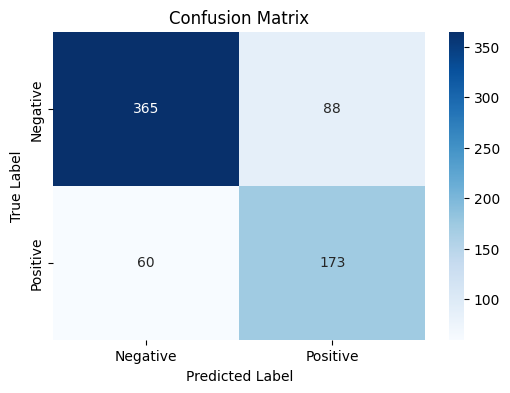

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Generate predictions
t_model_test_pred = t_model.predict(data_test['text'])[:, 1] > 0.5

# Calculate confusion matrix
conf_matrix = tf.math.confusion_matrix(data_test_label_actual, t_model_test_pred, num_classes=2).numpy()

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [67]:
# roc curve
tpr, fpr, threshold = metrics.roc_curve(data_test_label_actual, t_model_test_pred)
roc_auc = metrics.roc_auc_score(data_test_label_actual, t_model_test_pred)

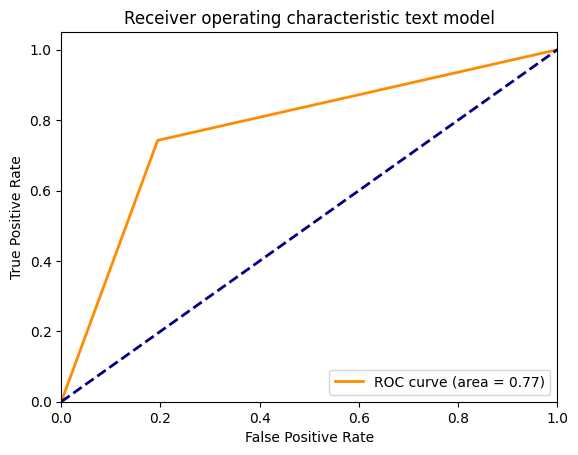

In [68]:
lw= 2
plt.plot(tpr,fpr,color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc
  )
plt.plot([0,1], [0,1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic text model")
plt.legend(loc="lower right")
plt.show()

### Analysis on Visual Data for classification

In [69]:
data_train['vision'].shape

(1284, 50, 20)

In [70]:
# preparing the data for training
AUTOTUNE = tf.data.experimental.AUTOTUNE
buffer_size = 64
batch_size = 64

#############################################
##### Dataset for Binary Classification #####
#############################################

train_visual_binary_ds = tf.data.Dataset.from_tensor_slices(
                (
                    data_train['vision'],
                    data_train['labels']
                )
            ).map(lambda x,y: (x,[1, 0]) if y < 0 else (x,[0,1])).shuffle(buffer_size).batch(batch_size).prefetch(AUTOTUNE)

valid_visual_binary_ds = tf.data.Dataset.from_tensor_slices(
                (
                    data_valid['vision'],
                    data_valid['labels']
                )
            ).map(lambda x,y: (x,[1, 0]) if y < 0 else (x,[0,1])).shuffle(buffer_size).batch(batch_size).prefetch(AUTOTUNE)

test_visual_binary_ds = tf.data.Dataset.from_tensor_slices(
                (
                    data_test['vision'],
                    data_test['labels']
                )
            ).map(lambda x,y: (x,[1, 0]) if y < 0 else (x,[0,1])).shuffle(buffer_size).batch(batch_size).prefetch(AUTOTUNE)


#################################################
##### Dataset for Multiclass Classification #####
#################################################

def convert_one_hot(x, y):
  y = tf.squeeze(y)
  return (x, tf.one_hot(tf.cast(tf.floor(y+3), tf.int64), 7))

train_visual_multi_ds = tf.data.Dataset.from_tensor_slices(
                (
                    data_train['vision'],
                    data_train['labels']
                )
            ).map(convert_one_hot).shuffle(buffer_size).batch(batch_size).prefetch(AUTOTUNE)

valid_visual_multi_ds = tf.data.Dataset.from_tensor_slices(
                (
                    data_valid['vision'],
                    data_valid['labels']
                )
            ).map(convert_one_hot).shuffle(buffer_size).batch(batch_size).prefetch(AUTOTUNE)

test_visual_multi_ds = tf.data.Dataset.from_tensor_slices(
                (
                    data_test['vision'],
                    data_test['labels']
                )
            ).map(convert_one_hot).shuffle(buffer_size).batch(batch_size).prefetch(AUTOTUNE)

In [71]:
#################################################
##### Classification Model on visual Data   #####
#################################################

v_seq_len = 50
v_latent_dim = 20

v_input_shape = (v_seq_len, v_latent_dim)
v_mask_value = np.zeros(shape=(v_latent_dim,), dtype=np.float32)

v_input = Input(shape=v_input_shape, name='v_input_layer')
v_mask_lyr = Masking(mask_value=v_mask_value, name='v_mask_layer')
v_lstm_lyr = LSTM(256, return_sequences=False, dropout=0.4, name='v_lstm_layer_1')
v_dense_lyr = Dense(2, activation='softmax', name='v_dense_layer')


x = v_mask_lyr(v_input)
x = v_lstm_lyr(x)
x = v_dense_lyr(x)

v_model = Model(inputs=v_input, outputs=x, name='visual_classification_model')
v_model.summary()

Model: "visual_classification_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 v_input_layer (InputLayer)  [(None, 50, 20)]          0         
                                                                 
 v_mask_layer (Masking)      (None, 50, 20)            0         
                                                                 
 v_lstm_layer_1 (LSTM)       (None, 256)               283648    
                                                                 
 v_dense_layer (Dense)       (None, 2)                 514       
                                                                 
Total params: 284162 (1.08 MB)
Trainable params: 284162 (1.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
v_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [73]:
v_history = v_model.fit(train_visual_binary_ds, validation_data=valid_visual_binary_ds,
            epochs=50, callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

Epoch 1/50
21/21 [==============================] - 9s 248ms/step - loss: 0.6873 - accuracy: 0.5639 - val_loss: 0.6656 - val_accuracy: 0.5808
Epoch 2/50
21/21 [==============================] - 5s 210ms/step - loss: 0.6661 - accuracy: 0.6028 - val_loss: 0.6605 - val_accuracy: 0.6070
Epoch 3/50
21/21 [==============================] - 4s 199ms/step - loss: 0.6621 - accuracy: 0.5950 - val_loss: 0.6580 - val_accuracy: 0.6070
Epoch 4/50
21/21 [==============================] - 3s 141ms/step - loss: 0.6558 - accuracy: 0.6137 - val_loss: 0.6588 - val_accuracy: 0.5939
Epoch 5/50
21/21 [==============================] - 2s 104ms/step - loss: 0.6536 - accuracy: 0.6176 - val_loss: 0.6524 - val_accuracy: 0.5852
Epoch 6/50
21/21 [==============================] - 4s 171ms/step - loss: 0.6504 - accuracy: 0.6083 - val_loss: 0.6548 - val_accuracy: 0.6157
Epoch 7/50
21/21 [==============================] - 2s 103ms/step - loss: 0.6477 - accuracy: 0.6246 - val_loss: 0.6573 - val_accuracy: 0.5895
Epoch 

In [74]:
v_model.evaluate(test_visual_binary_ds)

11/11 [==============================] - 0s 14ms/step - loss: 0.7028 - accuracy: 0.5539


[0.7027794718742371, 0.5539358854293823]

In [75]:
##############################################################
##### Classification Model on visual Data with Attention #####
##############################################################

v_seq_len = 50
v_latent_dim = 20

v_input_shape = (v_seq_len, v_latent_dim)
v_mask_value = np.zeros(shape=(v_latent_dim,), dtype=np.float32)

v_input = Input(shape=v_input_shape, name='v_input_layer')
v_mask_lyr = Masking(mask_value=v_mask_value, name='v_mask_layer')
v_lstm_lyr = LSTM(256, return_sequences=True, dropout=0.4, name='v_lstm_layer_1')
v_att_lyr = AttentionLayer()
v_dense_lyr_1 = Dense(32, activation='relu',  name='v_dense_layer_1')
v_dense_lyr_2 = Dense(2, activation='softmax', name='v_dense_layer_2')

x = v_mask_lyr(v_input)
x = v_lstm_lyr(x)
att_we, att_op = v_att_lyr(x)
op_1 = v_dense_lyr_1(att_op)
op_2 = v_dense_lyr_2(op_1)

v_model1 = Model(inputs=v_input, outputs=op_2, name='visual_classification_model_with_attention')
v_model1.summary()

Model: "visual_classification_model_with_attention"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 v_input_layer (InputLayer)  [(None, 50, 20)]          0         
                                                                 
 v_mask_layer (Masking)      (None, 50, 20)            0         
                                                                 
 v_lstm_layer_1 (LSTM)       (None, 50, 256)           283648    
                                                                 
 attention_layer_2 (Attenti  ((None, 50, 1),           306       
 onLayer)                     (None, 256))                       
                                                                 
 v_dense_layer_1 (Dense)     (None, 32)                8224      
                                                                 
 v_dense_layer_2 (Dense)     (None, 2)                 66        
                        

In [76]:
v_model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
v_history1 = v_model1.fit(train_visual_binary_ds, validation_data=valid_visual_binary_ds,
            epochs=50, callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

Epoch 1/50
21/21 [==============================] - 9s 164ms/step - loss: 0.6929 - accuracy: 0.5576 - val_loss: 0.6797 - val_accuracy: 0.6026
Epoch 2/50
21/21 [==============================] - 2s 103ms/step - loss: 0.6820 - accuracy: 0.5919 - val_loss: 0.6743 - val_accuracy: 0.6114
Epoch 3/50
21/21 [==============================] - 2s 102ms/step - loss: 0.6722 - accuracy: 0.6106 - val_loss: 0.6689 - val_accuracy: 0.6026
Epoch 4/50
21/21 [==============================] - 2s 113ms/step - loss: 0.6594 - accuracy: 0.6231 - val_loss: 0.6586 - val_accuracy: 0.6114
Epoch 5/50
21/21 [==============================] - 4s 164ms/step - loss: 0.6543 - accuracy: 0.6207 - val_loss: 0.6590 - val_accuracy: 0.5983
Epoch 6/50
21/21 [==============================] - 2s 104ms/step - loss: 0.6615 - accuracy: 0.6160 - val_loss: 0.6576 - val_accuracy: 0.5852
Epoch 7/50
21/21 [==============================] - 2s 102ms/step - loss: 0.6526 - accuracy: 0.6137 - val_loss: 0.6654 - val_accuracy: 0.5895
Epoch 

In [77]:
v_model1.evaluate(test_visual_binary_ds)

11/11 [==============================] - 0s 16ms/step - loss: 0.7035 - accuracy: 0.5160


[0.7034724354743958, 0.5160349607467651]

In [78]:
valid_data_df['v_model1']= v_model1.predict(data_valid['vision'])[:,1] >= 0.5
valid_data_df

8/8 [==============================] - 1s 13ms/step


,f_name,s_time,e_time,true_labels,t_model,v_model1
0,b'WKA5OygbEKI_20',b'131.7929705',b'133.6886621',True,True,True
1,b'WKA5OygbEKI_21',b'133.6886621',b'138.976644',True,False,True
2,b'WKA5OygbEKI_22',b'170.544898',b'172.729932',True,True,True
3,b'WKA5OygbEKI_1',b'4.432426304',b'8.852380952',True,True,True
4,b'WKA5OygbEKI_3',b'45.95804989',b'49.69954649',True,True,True
...,...,...,...,...,...,...
224,b'c5xsKMxpXnc_4',b'133.2097506',b'135.8836735',True,True,True
225,b'c5xsKMxpXnc_7',b'149.3829932',b'152.4360544',False,False,True
226,b'c5xsKMxpXnc_6',b'146.7290249',b'149.3829932',False,False,True
227,b'c5xsKMxpXnc_9',b'156.6764172',b'159.0609977',False,False,True


In [79]:
sum(valid_data_df.true_labels == valid_data_df.v_model1) / valid_data_df.v_model1.count()

0.5851528384279476

In [80]:
#confusion matrix
v_model1_test_pred = v_model1.predict(data_test['vision'])[:,1] > 0.5
tf.math.confusion_matrix(data_test_label_actual, v_model1_test_pred, 2)

22/22 [==============================] - 0s 12ms/step


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 77, 376],
       [ 18, 215]], dtype=int32)>

In [81]:
# roc curve
tpr, fpr, threshold = metrics.roc_curve(data_test_label_actual, v_model1_test_pred)
roc_auc = metrics.roc_auc_score(data_test_label_actual, v_model1_test_pred)

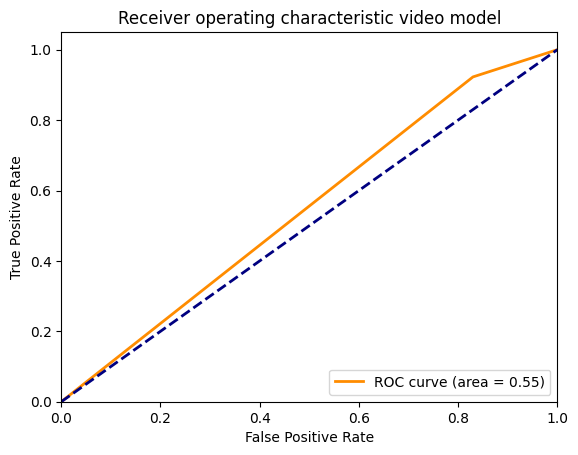

In [82]:
lw= 2
plt.plot(tpr,fpr,color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc
  )
plt.plot([0,1], [0,1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic video model")
plt.legend(loc="lower right")
plt.show()

### Analysis of Audio Data for Classification

In [83]:
data_train['audio'].shape

(1284, 50, 5)

In [84]:
# preparing the data for training
AUTOTUNE = tf.data.experimental.AUTOTUNE
buffer_size = 64
batch_size = 64

#############################################
##### Dataset for Binary Classification #####
#############################################

train_audio_binary_ds = tf.data.Dataset.from_tensor_slices(
                (
                    data_train['audio'],
                    data_train['labels']
                )
            ).map(lambda x,y: (x,[1, 0]) if y < 0 else (x,[0,1])).shuffle(buffer_size).batch(batch_size).prefetch(AUTOTUNE)

valid_audio_binary_ds = tf.data.Dataset.from_tensor_slices(
                (
                    data_valid['audio'],
                    data_valid['labels']
                )
            ).map(lambda x,y: (x,[1, 0]) if y < 0 else (x,[0,1])).shuffle(buffer_size).batch(batch_size).prefetch(AUTOTUNE)

test_audio_binary_ds = tf.data.Dataset.from_tensor_slices(
                (
                    data_test['audio'],
                    data_test['labels']
                )
            ).map(lambda x,y: (x,[1, 0]) if y < 0 else (x,[0,1])).shuffle(buffer_size).batch(batch_size).prefetch(AUTOTUNE)


#################################################
##### Dataset for Multiclass Classification #####
#################################################

def convert_one_hot(x, y):
  y = tf.squeeze(y)
  return (x, tf.one_hot(tf.cast(tf.floor(y+3), tf.int64), 7))

train_audio_multi_ds = tf.data.Dataset.from_tensor_slices(
                (
                    data_train['audio'],
                    data_train['labels']
                )
            ).map(convert_one_hot).shuffle(buffer_size).batch(batch_size).prefetch(AUTOTUNE)

valid_audio_multi_ds = tf.data.Dataset.from_tensor_slices(
                (
                    data_valid['audio'],
                    data_valid['labels']
                )
            ).map(convert_one_hot).shuffle(buffer_size).batch(batch_size).prefetch(AUTOTUNE)

test_audio_multi_ds = tf.data.Dataset.from_tensor_slices(
                (
                    data_test['audio'],
                    data_test['labels']
                )
            ).map(convert_one_hot).shuffle(buffer_size).batch(batch_size).prefetch(AUTOTUNE)

In [85]:
#################################################
##### Classification Model on Audio Data   #####
#################################################

a_seq_len = 50
a_latent_dim = 5

a_input_shape = (a_seq_len, a_latent_dim)
a_mask_value = np.zeros(shape=(a_latent_dim,), dtype=np.float32)

a_input = Input(shape=a_input_shape, name='a_input_layer')
a_mask_lyr = Masking(mask_value=a_mask_value, name='a_mask_layer')
a_lstm_lyr = LSTM(256, return_sequences=False, dropout=0.4, name='a_lstm_layer_1')
a_dense_lyr = Dense(2, activation='softmax', name='a_dense_layer')


x = a_mask_lyr(a_input)
x = a_lstm_lyr(x)
x = a_dense_lyr(x)

a_model = Model(inputs=a_input, outputs=x, name='audio_classification_model')
a_model.summary()

Model: "audio_classification_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 a_input_layer (InputLayer)  [(None, 50, 5)]           0         
                                                                 
 a_mask_layer (Masking)      (None, 50, 5)             0         
                                                                 
 a_lstm_layer_1 (LSTM)       (None, 256)               268288    
                                                                 
 a_dense_layer (Dense)       (None, 2)                 514       
                                                                 
Total params: 268802 (1.03 MB)
Trainable params: 268802 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
a_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
a_history = a_model.fit(train_audio_binary_ds, validation_data=valid_audio_binary_ds,
            epochs=500, callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

Epoch 1/500
21/21 [==============================] - 9s 158ms/step - loss: 0.6869 - accuracy: 0.5678 - val_loss: 0.6798 - val_accuracy: 0.6026
Epoch 2/500
21/21 [==============================] - 4s 176ms/step - loss: 0.6833 - accuracy: 0.5880 - val_loss: 0.6743 - val_accuracy: 0.6070
Epoch 3/500
21/21 [==============================] - 2s 99ms/step - loss: 0.6775 - accuracy: 0.5779 - val_loss: 0.6755 - val_accuracy: 0.5895
Epoch 4/500
21/21 [==============================] - 2s 100ms/step - loss: 0.6744 - accuracy: 0.5903 - val_loss: 0.6943 - val_accuracy: 0.5764
Epoch 5/500
21/21 [==============================] - 2s 103ms/step - loss: 0.6802 - accuracy: 0.5740 - val_loss: 0.6659 - val_accuracy: 0.6070
Epoch 6/500
21/21 [==============================] - 2s 99ms/step - loss: 0.6724 - accuracy: 0.5927 - val_loss: 0.6726 - val_accuracy: 0.5983
Epoch 7/500
21/21 [==============================] - 4s 177ms/step - loss: 0.6712 - accuracy: 0.5927 - val_loss: 0.6714 - val_accuracy: 0.5939
E

In [87]:
a_model.evaluate(test_audio_binary_ds)

11/11 [==============================] - 0s 14ms/step - loss: 0.6901 - accuracy: 0.5379


[0.690093994140625, 0.5379008650779724]

In [88]:
##############################################################
##### Classification Model on Audio Data with Attention #####
##############################################################

a_seq_len = 50
a_latent_dim = 5

a_input_shape = (a_seq_len, a_latent_dim)
a_mask_value = np.zeros(shape=(a_latent_dim,), dtype=np.float32)

a_input = Input(shape=a_input_shape, name='a_input_layer')
a_mask_lyr = Masking(mask_value=a_mask_value, name='a_mask_layer')
a_lstm_lyr = LSTM(256, return_sequences=True, dropout=0.4, name='a_lstm_layer_1')
a_att_lyr = AttentionLayer()
a_dense_lyr_1 = Dense(32, activation='relu',  name='a_dense_layer_1')
a_dense_lyr_2 = Dense(2, activation='softmax', name='a_dense_layer_2')

x = a_mask_lyr(a_input)
x = a_lstm_lyr(x)
att_we, att_op = a_att_lyr(x)
op_1 = a_dense_lyr_1(att_op)
op_2 = a_dense_lyr_2(op_1)

a_model1 = Model(inputs=a_input, outputs=op_2, name='audio_classification_model_with_attention')
a_model1.summary()

Model: "audio_classification_model_with_attention"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 a_input_layer (InputLayer)  [(None, 50, 5)]           0         
                                                                 
 a_mask_layer (Masking)      (None, 50, 5)             0         
                                                                 
 a_lstm_layer_1 (LSTM)       (None, 50, 256)           268288    
                                                                 
 attention_layer_3 (Attenti  ((None, 50, 1),           306       
 onLayer)                     (None, 256))                       
                                                                 
 a_dense_layer_1 (Dense)     (None, 32)                8224      
                                                                 
 a_dense_layer_2 (Dense)     (None, 2)                 66        
                         

In [89]:
a_model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
a_history1 = a_model1.fit(train_audio_binary_ds, validation_data=valid_audio_binary_ds,
            epochs=50, callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

Epoch 1/50
21/21 [==============================] - 9s 180ms/step - loss: 0.6913 - accuracy: 0.5670 - val_loss: 0.6850 - val_accuracy: 0.6026
Epoch 2/50
21/21 [==============================] - 2s 102ms/step - loss: 0.6823 - accuracy: 0.6036 - val_loss: 0.6956 - val_accuracy: 0.5502
Epoch 3/50
21/21 [==============================] - 2s 107ms/step - loss: 0.6861 - accuracy: 0.5631 - val_loss: 0.6799 - val_accuracy: 0.5852
Epoch 4/50
21/21 [==============================] - 2s 107ms/step - loss: 0.6785 - accuracy: 0.6012 - val_loss: 0.6845 - val_accuracy: 0.5721
Epoch 5/50
21/21 [==============================] - 4s 192ms/step - loss: 0.6763 - accuracy: 0.5896 - val_loss: 0.6802 - val_accuracy: 0.5764
Epoch 6/50
21/21 [==============================] - 2s 107ms/step - loss: 0.6770 - accuracy: 0.5927 - val_loss: 0.6739 - val_accuracy: 0.6114
Epoch 7/50
21/21 [==============================] - 2s 108ms/step - loss: 0.6701 - accuracy: 0.6051 - val_loss: 0.6895 - val_accuracy: 0.5633
Epoch 

In [90]:
a_model1.evaluate(test_audio_binary_ds)

11/11 [==============================] - 0s 14ms/step - loss: 0.6976 - accuracy: 0.5466


[0.6975991725921631, 0.5466472506523132]

In [91]:
valid_data_df['a_model1']= a_model1.predict(data_valid['audio'])[:,1] >= 0.5
valid_data_df

8/8 [==============================] - 1s 12ms/step


,f_name,s_time,e_time,true_labels,t_model,v_model1,a_model1
0,b'WKA5OygbEKI_20',b'131.7929705',b'133.6886621',True,True,True,True
1,b'WKA5OygbEKI_21',b'133.6886621',b'138.976644',True,False,True,True
2,b'WKA5OygbEKI_22',b'170.544898',b'172.729932',True,True,True,True
3,b'WKA5OygbEKI_1',b'4.432426304',b'8.852380952',True,True,True,True
4,b'WKA5OygbEKI_3',b'45.95804989',b'49.69954649',True,True,True,True
...,...,...,...,...,...,...,...
224,b'c5xsKMxpXnc_4',b'133.2097506',b'135.8836735',True,True,True,True
225,b'c5xsKMxpXnc_7',b'149.3829932',b'152.4360544',False,False,True,True
226,b'c5xsKMxpXnc_6',b'146.7290249',b'149.3829932',False,False,True,True
227,b'c5xsKMxpXnc_9',b'156.6764172',b'159.0609977',False,False,True,True


In [92]:
#confusion matrix
a_model1_test_pred = a_model1.predict(data_test['audio'])[:,1] > 0.5
tf.math.confusion_matrix(data_test_label_actual, a_model1_test_pred, 2)

22/22 [==============================] - 0s 12ms/step


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[122, 331],
       [ 28, 205]], dtype=int32)>

In [93]:
# roc curve
tpr, fpr, threshold = metrics.roc_curve(data_test_label_actual, a_model1_test_pred)
roc_auc = metrics.roc_auc_score(data_test_label_actual, a_model1_test_pred)

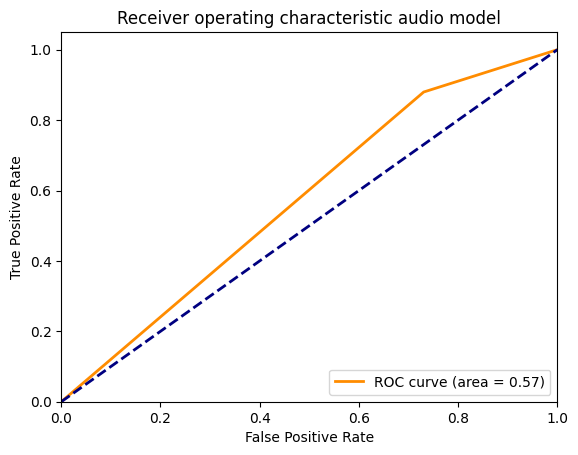

In [94]:
lw= 2
plt.plot(tpr,fpr,color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc
  )
plt.plot([0,1], [0,1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic audio model")
plt.legend(loc="lower right")
plt.show()

### T + V

In [95]:
# preparing the data for training
AUTOTUNE = tf.data.experimental.AUTOTUNE
buffer_size = 64
batch_size = 64

###################################################################
##### Dataset for Binary Classification Text and Visual Model #####
###################################################################

train_tv_binary_ds = tf.data.Dataset.from_tensor_slices(
                (
                    (data_train['text'],
                    data_train['vision']),
                    data_train['labels']
                )
            ).map(lambda x,y: (x,[1, 0]) if y < 0 else (x,[0,1])).shuffle(buffer_size).batch(batch_size).prefetch(AUTOTUNE)

valid_tv_binary_ds = tf.data.Dataset.from_tensor_slices(
                (
                    (data_valid['text'],
                    data_valid['vision']),
                    data_valid['labels']
                )
            ).map(lambda x,y: (x,[1, 0]) if y < 0 else (x,[0,1])).shuffle(buffer_size).batch(batch_size).prefetch(AUTOTUNE)

test_tv_binary_ds = tf.data.Dataset.from_tensor_slices(
                (
                    (data_test['text'],
                    data_test['vision']),
                    data_test['labels']
                )
            ).map(lambda x,y: (x,[1, 0]) if y < 0 else (x,[0,1])).shuffle(buffer_size).batch(batch_size).prefetch(AUTOTUNE)

In [96]:
for data in train_tv_binary_ds.take(1):
  print(data)

((<tf.Tensor: shape=(64, 50, 300), dtype=float32, numpy=
array([[[ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        ...,
        [ 0.043798 ,  0.024779 , -0.20937  , ..., -0.30099  ,
         -0.14584  ,  0.28188  ],
        [-0.4716   ,  0.25148  , -0.36664  , ..., -0.21312  ,
         -0.20518  ,  0.060325 ],
        [ 0.31617  ,  0.23897  , -0.42887  , ..., -0.028247 ,
         -0.46624  , -0.11906  ]],

       [[ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        ...,
        [-0.33355  ,  0.49611  , -0.27858  , ..., -

In [97]:
##############################################
#### Merging textual and visual analysis #####
##############################################

t_lstm_lyr.trainable = False
t_att_lyr.trainable  = False
t_dense_lyr_1.trainable = False

v_lstm_lyr.trainable = False
v_att_lyr.trainable  = False
v_dense_lyr_1.trainable = False


t_x = t_mask_lyr(t_input)
t_x = t_lstm_lyr(t_x)
t_att_we, t_att_op = t_att_lyr(t_x)
t_op = t_dense_lyr_1(t_att_op)

v_x = v_mask_lyr(v_input)
v_x = v_lstm_lyr(v_x)
v_att_we, v_att_op = v_att_lyr(v_x)
v_op = v_dense_lyr_1(v_att_op)

# x = tf.keras.layers.concatenate((t_att_op, v_att_op))
# x = tf.keras.layers.concatenate((t_op, v_op))
x  = tf.keras.layers.Lambda(lambda x: tf.math.multiply(x[0],x[1]))((t_op, v_op))

tv_dense_1 = Dense(16, activation='softmax', name='text_visual_dense_layer_1')
tv_dense = Dense(2, activation='softmax', name='text_visual_dense_layer')

x = tv_dense_1(x)
op = tv_dense(x)

tv_model = Model(inputs=[t_input, v_input], outputs=op, name='Text_Visual_Model')
tv_model.summary()

Model: "Text_Visual_Model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text_input_layer (InputLay  [(None, 50, 300)]            0         []                            
 er)                                                                                              
                                                                                                  
 v_input_layer (InputLayer)  [(None, 50, 20)]             0         []                            
                                                                                                  
 text_masking_layer (Maskin  (None, 50, 300)              0         ['text_input_layer[0][0]']    
 g)                                                                                               
                                                                                  

In [98]:
tv_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
tv_history1 = tv_model.fit(train_tv_binary_ds, validation_data=valid_tv_binary_ds,
            epochs=500, callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

Epoch 1/500
21/21 [==============================] - 10s 152ms/step - loss: 0.6933 - accuracy: 0.5070 - val_loss: 0.6882 - val_accuracy: 0.5983
Epoch 2/500
21/21 [==============================] - 1s 38ms/step - loss: 0.6896 - accuracy: 0.5701 - val_loss: 0.6862 - val_accuracy: 0.5983
Epoch 3/500
21/21 [==============================] - 1s 37ms/step - loss: 0.6879 - accuracy: 0.5701 - val_loss: 0.6840 - val_accuracy: 0.5983
Epoch 4/500
21/21 [==============================] - 1s 49ms/step - loss: 0.6862 - accuracy: 0.5701 - val_loss: 0.6817 - val_accuracy: 0.5983
Epoch 5/500
21/21 [==============================] - 1s 54ms/step - loss: 0.6847 - accuracy: 0.5701 - val_loss: 0.6805 - val_accuracy: 0.5983
Epoch 6/500
21/21 [==============================] - 1s 47ms/step - loss: 0.6837 - accuracy: 0.5701 - val_loss: 0.6788 - val_accuracy: 0.5983
Epoch 7/500
21/21 [==============================] - 1s 39ms/step - loss: 0.6824 - accuracy: 0.5701 - val_loss: 0.6776 - val_accuracy: 0.5983
Epoc

In [99]:
tv_model.evaluate(test_tv_binary_ds)

11/11 [==============================] - 0s 27ms/step - loss: 0.5671 - accuracy: 0.7216


[0.5670561194419861, 0.7215743660926819]

In [100]:
########## Trying convulution Netwwork ##########

##############################################
#### Merging textual and visual analysis #####
##############################################

t_lstm_lyr.trainable = True
t_att_lyr.trainable  = True
t_dense_lyr_1.trainable = True

v_lstm_lyr.trainable = True
v_att_lyr.trainable  = True
v_dense_lyr_1.trainable = True


t_x = t_mask_lyr(t_input)
t_x = t_lstm_lyr(t_x)
t_att_we, t_att_op = t_att_lyr(t_x)
t_op = t_dense_lyr_1(t_att_op)

v_x = v_mask_lyr(v_input)
v_x = v_lstm_lyr(v_x)
v_att_we, v_att_op = v_att_lyr(v_x)
v_op = v_dense_lyr_1(v_att_op)

# x = tf.keras.layers.concatenate((t_att_op, v_att_op))
# x = tf.keras.layers.concatenate((t_op, v_op))


t_op_reshaped = tf.keras.layers.Reshape((8,4,1))(t_op)
v_op_reshaped = tf.keras.layers.Reshape((8,4,1))(v_op)


op_stacked = tf.keras.layers.Concatenate()([t_op_reshaped, v_op_reshaped])

x = tf.keras.layers.Conv2D(32, (1,1))(op_stacked)
x = tf.keras.layers.Conv2D(64, (1,1))(x)
x = tf.keras.layers.Flatten()(x)

# x  = tf.keras.layers.Lambda(lambda x: tf.math.multiply(x[0],x[1]))((t_op, v_op))

tv_dense_1 = Dense(16, activation='softmax', name='text_visual_dense_layer_1')
tv_dense = Dense(2, activation='softmax', name='text_visual_dense_layer')

x = tv_dense_1(x)
op = tv_dense(x)

tv_model_conv = Model(inputs=[t_input, v_input], outputs=op, name='Text_Visual_Model')
tv_model_conv.summary()

Model: "Text_Visual_Model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text_input_layer (InputLay  [(None, 50, 300)]            0         []                            
 er)                                                                                              
                                                                                                  
 v_input_layer (InputLayer)  [(None, 50, 20)]             0         []                            
                                                                                                  
 text_masking_layer (Maskin  (None, 50, 300)              0         ['text_input_layer[0][0]']    
 g)                                                                                               
                                                                                  

In [101]:
tv_model_conv.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
tv_history_conv = tv_model_conv.fit(train_tv_binary_ds, validation_data=valid_tv_binary_ds,
            epochs=500, callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

Epoch 1/500
21/21 [==============================] - 17s 312ms/step - loss: 0.6115 - accuracy: 0.7181 - val_loss: 0.6464 - val_accuracy: 0.6507
Epoch 2/500
21/21 [==============================] - 5s 260ms/step - loss: 0.5451 - accuracy: 0.7555 - val_loss: 0.5690 - val_accuracy: 0.7424
Epoch 3/500
21/21 [==============================] - 4s 186ms/step - loss: 0.5162 - accuracy: 0.7921 - val_loss: 0.5430 - val_accuracy: 0.7729
Epoch 4/500
21/21 [==============================] - 4s 185ms/step - loss: 0.4725 - accuracy: 0.8341 - val_loss: 0.5178 - val_accuracy: 0.7817
Epoch 5/500
21/21 [==============================] - 5s 255ms/step - loss: 0.4450 - accuracy: 0.8606 - val_loss: 0.5127 - val_accuracy: 0.7904
Epoch 6/500
21/21 [==============================] - 4s 182ms/step - loss: 0.4298 - accuracy: 0.8723 - val_loss: 0.5275 - val_accuracy: 0.7686
Epoch 7/500
21/21 [==============================] - 5s 248ms/step - loss: 0.4196 - accuracy: 0.8754 - val_loss: 0.5220 - val_accuracy: 0.768

In [102]:
tv_model_conv.evaluate(test_tv_binary_ds)

11/11 [==============================] - 0s 36ms/step - loss: 0.5417 - accuracy: 0.7653


[0.5416699647903442, 0.7653061151504517]

### T + A

In [103]:
# preparing the data for training
AUTOTUNE = tf.data.experimental.AUTOTUNE
buffer_size = 64
batch_size = 64

###################################################################
##### Dataset for Binary Classification Text and Visual Model #####
###################################################################

train_ta_binary_ds = tf.data.Dataset.from_tensor_slices(
                (
                    (data_train['text'],
                    data_train['audio']),
                    data_train['labels']
                )
            ).map(lambda x,y: (x,[1, 0]) if y < 0 else (x,[0,1])).shuffle(buffer_size).batch(batch_size).prefetch(AUTOTUNE)

valid_ta_binary_ds = tf.data.Dataset.from_tensor_slices(
                (
                    (data_valid['text'],
                    data_valid['audio']),
                    data_valid['labels']
                )
            ).map(lambda x,y: (x,[1, 0]) if y < 0 else (x,[0,1])).shuffle(buffer_size).batch(batch_size).prefetch(AUTOTUNE)

test_ta_binary_ds = tf.data.Dataset.from_tensor_slices(
                (
                    (data_test['text'],
                    data_test['audio']),
                    data_test['labels']
                )
            ).map(lambda x,y: (x,[1, 0]) if y < 0 else (x,[0,1])).shuffle(buffer_size).batch(batch_size).prefetch(AUTOTUNE)

In [104]:
for data in train_ta_binary_ds.take(1):
  print(data)

((<tf.Tensor: shape=(64, 50, 300), dtype=float32, numpy=
array([[[ 0.0000e+00,  0.0000e+00,  0.0000e+00, ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        ...,
        [ 2.7204e-01, -6.2030e-02, -1.8840e-01, ...,  1.3015e-01,
         -1.8317e-01,  1.3230e-01],
        [-1.1823e-01, -2.2473e-01,  7.5460e-02, ...,  8.6068e-02,
         -1.0940e-01, -2.9882e-02],
        [ 3.0708e-01, -3.0603e-01,  4.3486e-01, ..., -1.2314e-01,
         -1.7244e-01,  3.2353e-01]],

       [[ 0.0000e+00,  0.0000e+00,  0.0000e+00, ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        ..

In [105]:
########## Trying convulution Netwwork ##########

##############################################
#### Merging textual and Audio analysis #####
##############################################

t_lstm_lyr.trainable = False
t_att_lyr.trainable  = False
t_dense_lyr_1.trainable = False

a_lstm_lyr.trainable = False
a_att_lyr.trainable  = False
a_dense_lyr_1.trainable = False


t_x = t_mask_lyr(t_input)
t_x = t_lstm_lyr(t_x)
t_att_we, t_att_op = t_att_lyr(t_x)
t_op = t_dense_lyr_1(t_att_op)

a_x = a_mask_lyr(a_input)
a_x = a_lstm_lyr(a_x)
a_att_we, a_att_op = a_att_lyr(a_x)
a_op = a_dense_lyr_1(a_att_op)

# x = tf.keras.layers.concatenate((t_att_op, v_att_op))
# x = tf.keras.layers.concatenate((t_op, v_op))


t_op_reshaped = tf.keras.layers.Reshape((8,4,1))(t_op)
a_op_reshaped = tf.keras.layers.Reshape((8,4,1))(a_op)


op_stacked = tf.keras.layers.Concatenate()([t_op_reshaped, a_op_reshaped])

x = tf.keras.layers.Conv2D(32, (1,1))(op_stacked)
x = tf.keras.layers.Conv2D(64, (1,1))(x)
x = tf.keras.layers.Flatten()(x)

# x  = tf.keras.layers.Lambda(lambda x: tf.math.multiply(x[0],x[1]))((t_op, v_op))

ta_dense_1 = Dense(16, activation='softmax', name='text_audio_dense_layer_1')
ta_dense = Dense(2, activation='softmax', name='text_audio_dense_layer')

x = ta_dense_1(x)
op = ta_dense(x)

ta_model_conv = Model(inputs=[t_input, a_input], outputs=op, name='Text_Audio_Model')
ta_model_conv.summary()

Model: "Text_Audio_Model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text_input_layer (InputLay  [(None, 50, 300)]            0         []                            
 er)                                                                                              
                                                                                                  
 a_input_layer (InputLayer)  [(None, 50, 5)]              0         []                            
                                                                                                  
 text_masking_layer (Maskin  (None, 50, 300)              0         ['text_input_layer[0][0]']    
 g)                                                                                               
                                                                                   

In [106]:
ta_model_conv.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
ta_history_conv = ta_model_conv.fit(train_ta_binary_ds, validation_data=valid_ta_binary_ds,
            epochs=500, callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

Epoch 1/500
21/21 [==============================] - 11s 158ms/step - loss: 0.5888 - accuracy: 0.7858 - val_loss: 0.5760 - val_accuracy: 0.7380
Epoch 2/500
21/21 [==============================] - 1s 38ms/step - loss: 0.4592 - accuracy: 0.8988 - val_loss: 0.5358 - val_accuracy: 0.7773
Epoch 3/500
21/21 [==============================] - 1s 38ms/step - loss: 0.4316 - accuracy: 0.8988 - val_loss: 0.5267 - val_accuracy: 0.7773
Epoch 4/500
21/21 [==============================] - 1s 38ms/step - loss: 0.4191 - accuracy: 0.9019 - val_loss: 0.5213 - val_accuracy: 0.7773
Epoch 5/500
21/21 [==============================] - 1s 38ms/step - loss: 0.4098 - accuracy: 0.9019 - val_loss: 0.5173 - val_accuracy: 0.7773
Epoch 6/500
21/21 [==============================] - 1s 37ms/step - loss: 0.4042 - accuracy: 0.9003 - val_loss: 0.5145 - val_accuracy: 0.7817
Epoch 7/500
21/21 [==============================] - 1s 37ms/step - loss: 0.3984 - accuracy: 0.8956 - val_loss: 0.5152 - val_accuracy: 0.7817
Epoc

In [107]:
ta_model_conv.evaluate(test_ta_binary_ds)

11/11 [==============================] - 0s 29ms/step - loss: 0.5375 - accuracy: 0.7741


[0.5375459790229797, 0.7740525007247925]

### T + V + A

In [108]:
# preparing the data for training
AUTOTUNE = tf.data.experimental.AUTOTUNE
buffer_size = 64
batch_size = 64

###################################################################
##### Dataset for Binary Classification Text and Visual Model #####
###################################################################

train_tva_binary_ds = tf.data.Dataset.from_tensor_slices(
                (
                    (data_train['text'],
                     data_train['vision'],
                     data_train['audio']
                    ),
                    data_train['labels']
                )
            ).map(lambda x,y: (x,[1, 0]) if y < 0 else (x,[0,1])).shuffle(buffer_size).batch(batch_size).prefetch(AUTOTUNE)

valid_tva_binary_ds = tf.data.Dataset.from_tensor_slices(
                (
                    (data_valid['text'],
                     data_valid['vision'],
                     data_valid['audio']
                    ),
                    data_valid['labels']
                )
            ).map(lambda x,y: (x,[1, 0]) if y < 0 else (x,[0,1])).shuffle(buffer_size).batch(batch_size).prefetch(AUTOTUNE)

test_tva_binary_ds = tf.data.Dataset.from_tensor_slices(
                (
                    (data_test['text'],
                     data_test['vision'],
                     data_test['audio']
                    ),
                    data_test['labels']
                )
            ).map(lambda x,y: (x,[1, 0]) if y < 0 else (x,[0,1])).shuffle(buffer_size).batch(batch_size).prefetch(AUTOTUNE)

In [109]:
########## Trying convulution Netwwork ##########

##############################################
#### Merging textual and Audio analysis #####
##############################################

t_lstm_lyr.trainable = False
t_att_lyr.trainable  = False
t_dense_lyr_1.trainable = False

v_lstm_lyr.trainable = False
v_att_lyr.trainable  = False
v_dense_lyr_1.trainable = False

a_lstm_lyr.trainable = False
a_att_lyr.trainable  = False
a_dense_lyr_1.trainable = False

t_x = t_mask_lyr(t_input)
t_x = t_lstm_lyr(t_x)
t_att_we, t_att_op = t_att_lyr(t_x)
t_op = t_dense_lyr_1(t_att_op)

v_x = v_mask_lyr(v_input)
v_x = v_lstm_lyr(v_x)
v_att_we, v_att_op = v_att_lyr(v_x)
v_op = v_dense_lyr_1(v_att_op)

a_x = a_mask_lyr(a_input)
a_x = a_lstm_lyr(a_x)
a_att_we, a_att_op = a_att_lyr(a_x)
a_op = a_dense_lyr_1(a_att_op)

# x = tf.keras.layers.concatenate((t_att_op, v_att_op))
# x = tf.keras.layers.concatenate((t_op, v_op))

t_op_reshaped = tf.keras.layers.Reshape((8,4,1))(t_op)
v_op_reshaped = tf.keras.layers.Reshape((8,4,1))(v_op)
a_op_reshaped = tf.keras.layers.Reshape((8,4,1))(a_op)

op_stacked = tf.keras.layers.Concatenate()([t_op_reshaped, v_op_reshaped, a_op_reshaped])

x = tf.keras.layers.Conv2D(32, (2,2))(op_stacked)
x = tf.keras.layers.Conv2D(64, (2,2))(x)
x = tf.keras.layers.Flatten()(x)

# x  = tf.keras.layers.Lambda(lambda x: tf.math.multiply(x[0],x[1]))((t_op, v_op))

tva_dense_1 = Dense(16, activation='softmax', name='text_vision_audio_dense_layer_1')
tva_dense = Dense(2, activation='softmax', name='text_vision_audio_dense_layer')

x = tva_dense_1(x)
op = tva_dense(x)

tva_model_conv = Model(inputs=[t_input, v_input, a_input], outputs=op, name='Text_Vision_Audio_Model')
tva_model_conv.summary()

Model: "Text_Vision_Audio_Model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text_input_layer (InputLay  [(None, 50, 300)]            0         []                            
 er)                                                                                              
                                                                                                  
 v_input_layer (InputLayer)  [(None, 50, 20)]             0         []                            
                                                                                                  
 a_input_layer (InputLayer)  [(None, 50, 5)]              0         []                            
                                                                                                  
 text_masking_layer (Maskin  (None, 50, 300)              0         ['text_i

In [110]:
tva_model_conv.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
tva_history_conv = tva_model_conv.fit(train_tva_binary_ds, validation_data=valid_tva_binary_ds,
            epochs=500, callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

Epoch 1/500
21/21 [==============================] - 17s 234ms/step - loss: 0.6258 - accuracy: 0.8497 - val_loss: 0.6055 - val_accuracy: 0.7729
Epoch 2/500
21/21 [==============================] - 1s 52ms/step - loss: 0.4768 - accuracy: 0.9065 - val_loss: 0.5438 - val_accuracy: 0.7729
Epoch 3/500
21/21 [==============================] - 2s 73ms/step - loss: 0.4143 - accuracy: 0.9089 - val_loss: 0.5281 - val_accuracy: 0.7686
Epoch 4/500
21/21 [==============================] - 1s 51ms/step - loss: 0.4005 - accuracy: 0.9042 - val_loss: 0.5219 - val_accuracy: 0.7729
Epoch 5/500
21/21 [==============================] - 1s 51ms/step - loss: 0.3905 - accuracy: 0.9104 - val_loss: 0.5190 - val_accuracy: 0.7686
Epoch 6/500
21/21 [==============================] - 1s 51ms/step - loss: 0.3816 - accuracy: 0.9050 - val_loss: 0.5168 - val_accuracy: 0.7686
Epoch 7/500
21/21 [==============================] - 1s 51ms/step - loss: 0.3741 - accuracy: 0.9073 - val_loss: 0.5148 - val_accuracy: 0.7686
Epoc

In [111]:
tva_model_conv.evaluate(test_tva_binary_ds)

11/11 [==============================] - 1s 48ms/step - loss: 0.5434 - accuracy: 0.7638


[0.5434075593948364, 0.7638484239578247]

In [112]:
tva_model_conv_test_pred

NameError: name 'tva_model_conv_test_pred' is not defined

In [113]:
# tva_model_conv.predict(test_tva_binary_ds)
actual = []
pred = []
for data in test_tva_binary_ds:
  pred.extend(tva_model_conv.predict(data[0])[:,1] > 0.5)
  actual.extend((data[1][:,1] == 1).numpy())

2/2 [==============================] - 4s 150ms/step


In [114]:
print(len(pred))
print(len(actual))

686
686


In [115]:
#confusion matrix
tva_model_conv_test_pred = tva_model_conv.predict(test_tva_binary_ds)[:,1] > 0.5
tf.math.confusion_matrix(actual, pred, 2)

11/11 [==============================] - 7s 39ms/step


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[306,  73],
       [ 89, 218]], dtype=int32)>

In [116]:
# roc curve
tpr, fpr, threshold = metrics.roc_curve(actual, pred)
roc_auc = metrics.roc_auc_score(actual, pred)

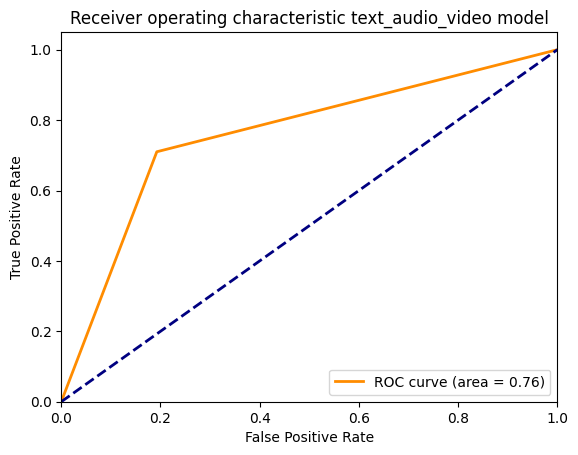

In [117]:
lw= 2
plt.plot(tpr,fpr,color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc
  )
plt.plot([0,1], [0,1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic text_audio_video model")
plt.legend(loc="lower right")
plt.show()

In [118]:
tva_input_raw = (data_valid['text'], data_valid['vision'], data_valid['audio'])
valid_data_df['tva_model_conv'] = tva_model_conv.predict(tva_input_raw)[:,1] >= 0.5
valid_data_df

8/8 [==============================] - 4s 58ms/step


,f_name,s_time,e_time,true_labels,t_model,v_model1,a_model1,tva_model_conv
0,b'WKA5OygbEKI_20',b'131.7929705',b'133.6886621',True,True,True,True,True
1,b'WKA5OygbEKI_21',b'133.6886621',b'138.976644',True,False,True,True,True
2,b'WKA5OygbEKI_22',b'170.544898',b'172.729932',True,True,True,True,True
3,b'WKA5OygbEKI_1',b'4.432426304',b'8.852380952',True,True,True,True,True
4,b'WKA5OygbEKI_3',b'45.95804989',b'49.69954649',True,True,True,True,True
...,...,...,...,...,...,...,...,...
224,b'c5xsKMxpXnc_4',b'133.2097506',b'135.8836735',True,True,True,True,True
225,b'c5xsKMxpXnc_7',b'149.3829932',b'152.4360544',False,False,True,True,False
226,b'c5xsKMxpXnc_6',b'146.7290249',b'149.3829932',False,False,True,True,False
227,b'c5xsKMxpXnc_9',b'156.6764172',b'159.0609977',False,False,True,True,False


In [119]:
sum(valid_data_df.true_labels == valid_data_df.tva_model_conv) / valid_data_df.tva_model_conv.count()

0.7729257641921398

#### Using attention on combination of all modalities.

In [120]:
########## Trying convulution Netwwork ##########

##############################################
#### Merging textual and Audio analysis #####
##############################################

t_lstm_lyr.trainable = False
t_att_lyr.trainable  = False
t_dense_lyr_1.trainable = False

v_lstm_lyr.trainable = False
v_att_lyr.trainable  = False
v_dense_lyr_1.trainable = False

a_lstm_lyr.trainable = False
a_att_lyr.trainable  = False
a_dense_lyr_1.trainable = False

t_x = t_mask_lyr(t_input)
t_x = t_lstm_lyr(t_x)
t_att_we, t_att_op = t_att_lyr(t_x)
t_op = t_dense_lyr_1(t_att_op)

v_x = v_mask_lyr(v_input)
v_x = v_lstm_lyr(v_x)
v_att_we, v_att_op = v_att_lyr(v_x)
v_op = v_dense_lyr_1(v_att_op)

a_x = a_mask_lyr(a_input)
a_x = a_lstm_lyr(a_x)
a_att_we, a_att_op = a_att_lyr(a_x)
a_op = a_dense_lyr_1(a_att_op)

# x = tf.keras.layers.concatenate((t_att_op, v_att_op))
# x = tf.keras.layers.concatenate((t_op, v_op))

t_op_reshaped = tf.keras.layers.Reshape((1,32))(t_op)
v_op_reshaped = tf.keras.layers.Reshape((1,32))(v_op)
a_op_reshaped = tf.keras.layers.Reshape((1,32))(a_op)

op_stacked = tf.keras.layers.Concatenate(axis=1)([t_op_reshaped, v_op_reshaped, a_op_reshaped])

tva_att_lyr = AttentionLayer()
tva_att_we, tva_att_op = tva_att_lyr(op_stacked)

# x = tf.keras.layers.Conv2D(32, (2,2))(op_stacked)
# x = tf.keras.layers.Conv2D(64, (2,2))(x)
# x = tf.keras.layers.Flatten()(x)

# x  = tf.keras.layers.Lambda(lambda x: tf.math.multiply(x[0],x[1]))((t_op, v_op))

tva_dense_1 = Dense(16, activation='softmax', name='text_vision_audio_dense_layer_1')
tva_dense = Dense(2, activation='softmax', name='text_vision_audio_dense_layer')

x = tva_dense_1(tva_att_op)
op = tva_dense(x)

tva_model_att = Model(inputs=[t_input, v_input, a_input], outputs=op, name='Text_Vision_Audio_Model')
tva_model_att.summary()

Model: "Text_Vision_Audio_Model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text_input_layer (InputLay  [(None, 50, 300)]            0         []                            
 er)                                                                                              
                                                                                                  
 v_input_layer (InputLayer)  [(None, 50, 20)]             0         []                            
                                                                                                  
 a_input_layer (InputLayer)  [(None, 50, 5)]              0         []                            
                                                                                                  
 text_masking_layer (Maskin  (None, 50, 300)              0         ['text_i

In [121]:
tva_model_att.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
tva_history_att = tva_model_att.fit(train_tva_binary_ds, validation_data=valid_tva_binary_ds,
            epochs=500, callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

Epoch 1/500
21/21 [==============================] - 17s 266ms/step - loss: 0.6872 - accuracy: 0.5701 - val_loss: 0.6800 - val_accuracy: 0.5983
Epoch 2/500
21/21 [==============================] - 1s 50ms/step - loss: 0.6766 - accuracy: 0.5701 - val_loss: 0.6730 - val_accuracy: 0.5983
Epoch 3/500
21/21 [==============================] - 1s 51ms/step - loss: 0.6656 - accuracy: 0.5787 - val_loss: 0.6656 - val_accuracy: 0.5895
Epoch 4/500
21/21 [==============================] - 1s 57ms/step - loss: 0.6530 - accuracy: 0.6051 - val_loss: 0.6588 - val_accuracy: 0.5895
Epoch 5/500
21/21 [==============================] - 1s 51ms/step - loss: 0.6396 - accuracy: 0.6480 - val_loss: 0.6519 - val_accuracy: 0.5983
Epoch 6/500
21/21 [==============================] - 1s 50ms/step - loss: 0.6251 - accuracy: 0.6885 - val_loss: 0.6451 - val_accuracy: 0.6114
Epoch 7/500
21/21 [==============================] - 1s 67ms/step - loss: 0.6095 - accuracy: 0.7274 - val_loss: 0.6374 - val_accuracy: 0.6376
Epoc

In [122]:
tva_model_att.evaluate(test_tva_binary_ds)

11/11 [==============================] - 0s 41ms/step - loss: 0.5381 - accuracy: 0.7668


[0.5381155014038086, 0.7667638659477234]

In [123]:
tva_input_raw = (data_valid['text'], data_valid['vision'], data_valid['audio'])
valid_data_df['tva_model_att'] = tva_model_att.predict(tva_input_raw)[:,1] >= 0.5
valid_data_df

8/8 [==============================] - 4s 40ms/step


,f_name,s_time,e_time,true_labels,t_model,v_model1,a_model1,tva_model_conv,tva_model_att
0,b'WKA5OygbEKI_20',b'131.7929705',b'133.6886621',True,True,True,True,True,True
1,b'WKA5OygbEKI_21',b'133.6886621',b'138.976644',True,False,True,True,True,True
2,b'WKA5OygbEKI_22',b'170.544898',b'172.729932',True,True,True,True,True,True
3,b'WKA5OygbEKI_1',b'4.432426304',b'8.852380952',True,True,True,True,True,True
4,b'WKA5OygbEKI_3',b'45.95804989',b'49.69954649',True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
224,b'c5xsKMxpXnc_4',b'133.2097506',b'135.8836735',True,True,True,True,True,True
225,b'c5xsKMxpXnc_7',b'149.3829932',b'152.4360544',False,False,True,True,False,False
226,b'c5xsKMxpXnc_6',b'146.7290249',b'149.3829932',False,False,True,True,False,False
227,b'c5xsKMxpXnc_9',b'156.6764172',b'159.0609977',False,False,True,True,False,False


In [130]:
# valid_data_df.to_excel('output_comparison.xls')

In [131]:
# from google.colab import files
# files.download('output_comparison.xls')

## OPTIMAL THRESHOLD

In [126]:
#### finidng the Threshold value
def optimal_threshold(model, ds, threshold=[x/10 for x in range(1, 10)]):
  y_pred = []
  y_true = []
  print(model.name)
  for data in ds:
    y_pred.append(model.predict(data[0]))
    y_true.append(data[1])

  y_pred_all = np.concatenate(y_pred)
  y_true_all = np.concatenate(y_true)

  for thres in threshold:
    metric = tfa.metrics.F1Score(num_classes=2, threshold=thres)
    metric.update_state(y_true_all, y_pred_all)
    result = metric.result()
    print(f'{thres}:{result.numpy()}')


optimal_threshold(tva_model_att, test_tva_binary_ds)

Text_Vision_Audio_Model
2/2 [==============================] - 4s 37ms/step
0.1:[0.757384  0.6183283]
0.2:[0.78801847 0.67557716]
0.3:[0.7995198 0.7091413]
0.4:[0.7984981 0.7256098]
0.5:[0.7905759 0.7368421]
0.6:[0.74860334 0.7190227 ]
0.7:[0.6769231 0.690167 ]
0.8:[0.5136612 0.6349206]
0.9:[0.         0.45754716]


In [127]:
optimal_threshold(tva_model_conv, test_tva_binary_ds)

Text_Vision_Audio_Model
2/2 [==============================] - 0s 53ms/step
0.1:[0.7117371 0.6183283]
0.2:[0.7931035 0.6183283]
0.3:[0.7914033  0.73501587]
0.4:[0.79134864 0.73770493]
0.5:[0.7906977  0.72909707]
0.6:[0.7900262 0.7201365]
0.7:[0.77235776 0.7160069 ]
0.8:[0.  0.7]
0.9:[0. 0.]


In [128]:
y_true = []
y_pred = []
for data in test_tva_binary_ds:
  y_pred.append(tva_model_att.predict(data[0]))
  y_true.append(data[1])

y_true_all = np.concatenate(y_true)
y_pred_all = np.concatenate(y_pred)

2/2 [==============================] - 0s 39ms/step


In [129]:
y_pred_yes = y_pred_all[:,1] > 0.5
y_true_yes = y_true_all[:,1]
sum(y_true_yes == y_pred_yes) / len(y_true_yes)

0.7667638483965015